In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#On importe notre fichier nettoyé
data = pd.read_csv('data_conso_emissions.csv', sep = ';')
display(data.head())

,OSEBuildingID,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,Error Buildings,log_conso,log_emissions,TotalGFA,Age,PropertyType,Sum_energies,Surface/étage,Surface/batiment,Type_energie
0,1,NonResidential,Hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,...,No Error,6.858920,2.397905,88434.0,89,Hotel,7226362.00,7369.500000,88434.0,1.0
1,2,NonResidential,Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,...,No Error,6.923655,2.471086,103566.0,20,Hotel,8387933.00,8045.636364,88502.0,2.0
2,3,NonResidential,Hotel,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,...,No Error,7.860859,3.319997,756493.0,47,Hotel,72587018.00,18521.756098,759392.0,1.0
3,5,NonResidential,Hotel,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,...,No Error,6.832163,2.457019,61320.0,90,Hotel,6794583.25,6132.000000,61320.0,1.0
4,8,NonResidential,Hotel,401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,...,No Error,7.151450,2.703300,191454.0,36,Hotel,14172605.00,6310.000000,113580.0,2.0


# 1) Structure des données

In [3]:
data.shape

(1363, 38)

In [4]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Address',
       'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'CountPropertyUseTypes',
       'Error Buildings', 'log_conso', 'log_emissions', 'TotalGFA', 'Age',
       'PropertyType', 'Sum_energies', 'Surface/étage', 'Surface/batiment',
       'Type_energie'],
      dtype='object')

# 2) Corrélations

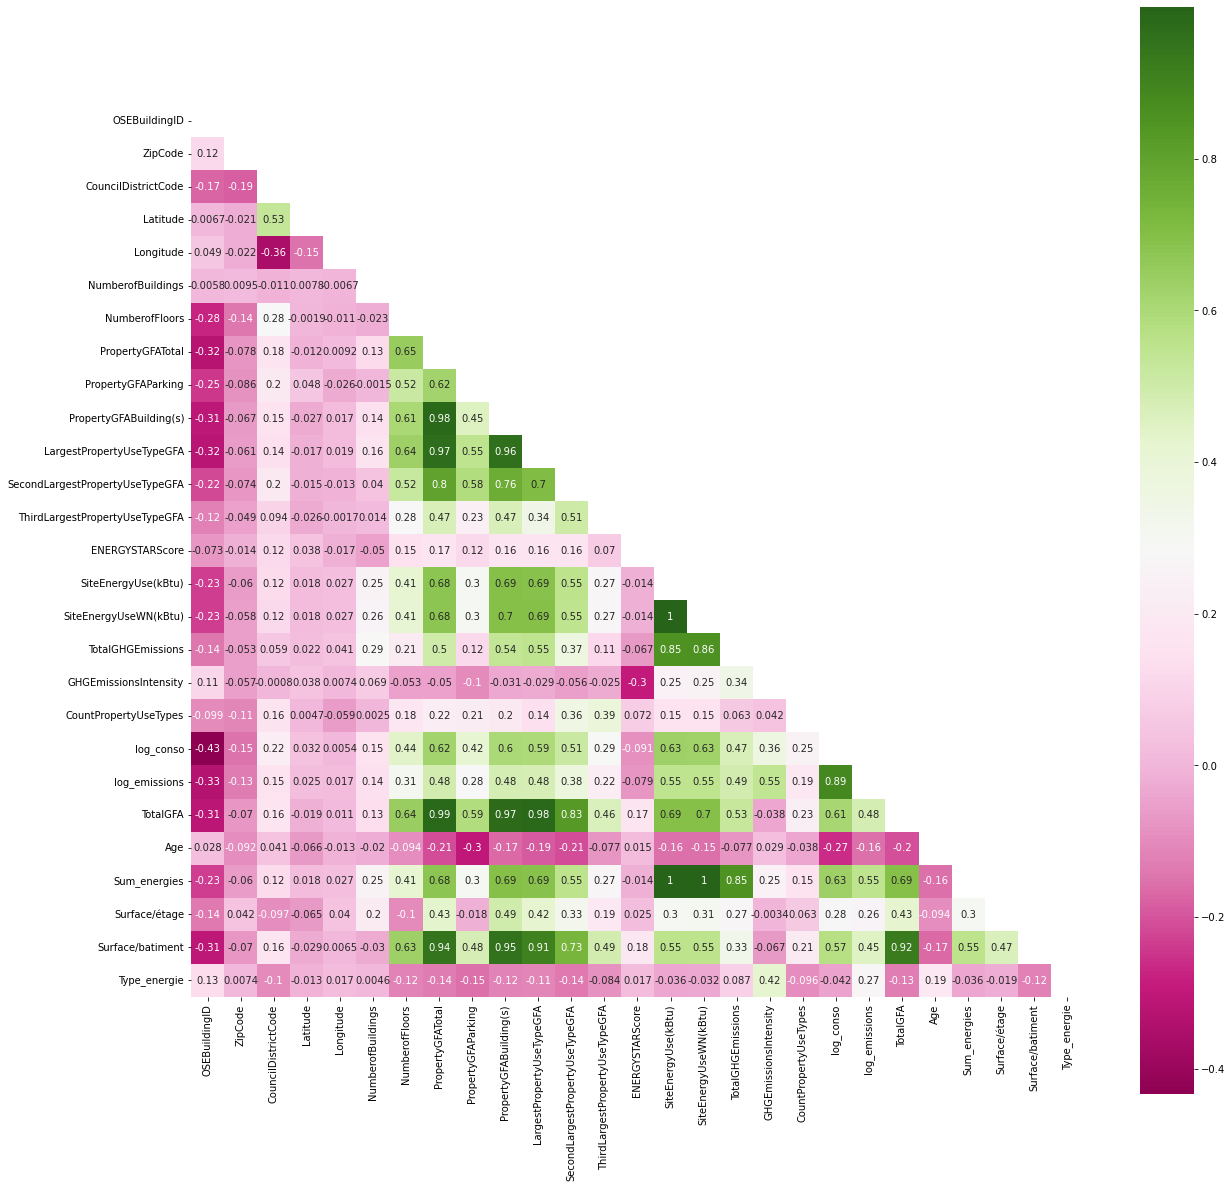

In [5]:
#Heatmap des corrélation

upp_mat = np.triu(data.corr())

fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data.corr(),annot = True,square=True, mask = upp_mat, cmap="PiYG");

On va supprimer les variables corrélées à nos variables cibles

In [6]:
#Variables corrélées > 0.7
var_corr = ['Sum_energies','SiteEnergyUseWN(kBtu)']

#On supprime ces variables
df = data.copy()
df = df.drop(var_corr, axis = 1).set_index('OSEBuildingID')

In [7]:
#Variables qu'il reste :
df.columns.to_list()

['BuildingType',
 'PrimaryPropertyType',
 'Address',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'CountPropertyUseTypes',
 'Error Buildings',
 'log_conso',
 'log_emissions',
 'TotalGFA',
 'Age',
 'PropertyType',
 'Surface/étage',
 'Surface/batiment',
 'Type_energie']

# 3) Sélection features

In [8]:
#Sélection de nos features pour modélisation
features = ['Age', 'PropertyType', 'PropertyGFAParking', 'Neighborhood', 'ZipCode',
            'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
           'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment', 'Type_energie']
target_1 = ['TotalGHGEmissions']
target_2 = ['log_emissions']

In [9]:
display(df[features].head())
display(df[target_1].head())
df[features].dtypes

,Age,PropertyType,PropertyGFAParking,Neighborhood,ZipCode,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,CountPropertyUseTypes,Surface/étage,Surface/batiment,Type_energie
OSEBuildingID,,,,,,,,,,,,
1,89,Hotel,0,DOWNTOWN,98101.0,0.0,1.0,12,1.0,7369.500000,88434.0,1.0
2,20,Hotel,15064,DOWNTOWN,98101.0,4622.0,1.0,11,3.0,8045.636364,88502.0,2.0
3,47,Hotel,196718,DOWNTOWN,98101.0,0.0,1.0,41,1.0,18521.756098,759392.0,1.0
5,90,Hotel,0,DOWNTOWN,98101.0,0.0,1.0,10,1.0,6132.000000,61320.0,1.0
8,36,Hotel,62000,DOWNTOWN,98121.0,0.0,1.0,18,3.0,6310.000000,113580.0,2.0


,TotalGHGEmissions
OSEBuildingID,
1,249.98
2,295.86
3,2089.28
5,286.43
8,505.01


Age                                 int64
PropertyType                       object
PropertyGFAParking                  int64
Neighborhood                       object
ZipCode                           float64
ThirdLargestPropertyUseTypeGFA    float64
NumberofBuildings                 float64
NumberofFloors                      int64
CountPropertyUseTypes             float64
Surface/étage                     float64
Surface/batiment                  float64
Type_energie                      float64
dtype: object

## 3.1) Observation des variables catégorielles

In [10]:
#Création de deux variables contenant les features de type numérique ou catégorielle
num_features = df[features].select_dtypes(include = ['int64', 'float64'])
cat_features = df[features].select_dtypes(include = 'object')

In [11]:
print('Variables numériques:')
display(num_features.columns)
print('Variables catégorielles:')
display(cat_features.columns)

Variables numériques:


Index(['Age', 'PropertyGFAParking', 'ZipCode',
       'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
       'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment',
       'Type_energie'],
      dtype='object')

Variables catégorielles:


Index(['PropertyType', 'Neighborhood'], dtype='object')

In [12]:
#Affichons les valeurs uniques des variables catégorielles
for col in cat_features:
    print(cat_features[col].unique())

['Hotel' 'Other' 'Mixed Use Property' 'University' 'Office'
 'Warehouse_Storage' 'K-12 School' 'Hospital_Medical Office' 'Food Store'
 'Worship Facility' 'Laboratory' 'Restaurant']
['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH'
 'MAGNOLIA / QUEEN ANNE' 'BALLARD' 'NORTHWEST' 'CENTRAL' 'SOUTHEAST'
 'NORTH' 'DELRIDGE' 'SOUTHWEST']


In [13]:
display(cat_features.columns)
for col in cat_features:
    display('Colonne: ' + col)
    display(cat_features[col].value_counts())

Index(['PropertyType', 'Neighborhood'], dtype='object')

'Colonne: PropertyType'

Office                     427
Warehouse_Storage          249
Other                      196
Food Store                 105
Mixed Use Property         102
K-12 School                 86
Hotel                       67
Worship Facility            58
Hospital_Medical Office     39
University                  15
Restaurant                  12
Laboratory                   7
Name: PropertyType, dtype: int64

'Colonne: Neighborhood'

DOWNTOWN                 315
GREATER DUWAMISH         298
LAKE UNION               134
MAGNOLIA / QUEEN ANNE    121
EAST                      96
NORTHEAST                 86
NORTHWEST                 66
BALLARD                   61
NORTH                     48
CENTRAL                   38
SOUTHEAST                 36
DELRIDGE                  33
SOUTHWEST                 31
Name: Neighborhood, dtype: int64

Nous avons besoin de transformer nos variables qualitatives en variables numériques afin de les exploiter pour notre modélisation. La méthode que nous allons utiliser pour la transformation est le **codage disjonctif complet**. C'est-à-dire qu'à chacune de nos modalités, nous allons associer une variable indicatrice = *dummy variable*. 

## 3.2) Encodage des variables catégorielles et standardisation des variables quantitatives
### 3.2.1) Pandas get_dummies

In [14]:
#Créer et ajouter des colonnes (dummies) binaires indiquant (1) ou non (0) la donnée
col_to_encode = cat_features.columns

df_dum1 = pd.get_dummies(df[features], columns = col_to_encode)
display(df_dum1.columns)
df_dum1.head()
df_dum1.shape

Index(['Age', 'PropertyGFAParking', 'ZipCode',
       'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
       'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment',
       'Type_energie', 'PropertyType_Food Store',
       'PropertyType_Hospital_Medical Office', 'PropertyType_Hotel',
       'PropertyType_K-12 School', 'PropertyType_Laboratory',
       'PropertyType_Mixed Use Property', 'PropertyType_Office',
       'PropertyType_Other', 'PropertyType_Restaurant',
       'PropertyType_University', 'PropertyType_Warehouse_Storage',
       'PropertyType_Worship Facility', 'Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST'],
      dt

(1363, 35)

In [15]:
from sklearn.preprocessing import StandardScaler

#Sélection colonnes à standardiser
col_to_scale = num_features.columns
data_to_scale = df_dum1[col_to_scale]

#Initialisation de StandardScaler()
std_scale = StandardScaler()

#Standardisation des colonnes sélectionnées
df_dum1[col_to_scale] = std_scale.fit_transform(data_to_scale)

In [16]:
display(df_dum1.head())

,Age,PropertyGFAParking,ZipCode,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,CountPropertyUseTypes,Surface/étage,Surface/batiment,Type_energie,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,1.035187,-0.326362,-0.789445,-0.214782,-0.097499,1.121610,-0.774043,-0.414565,-0.048123,-0.560285,...,1,0,0,0,0,0,0,0,0,0
2,-1.049350,0.006934,-0.789445,0.094455,-0.097499,0.976181,0.824473,-0.403544,-0.047716,1.590895,...,1,0,0,0,0,0,0,0,0,0
3,-0.233662,4.026093,-0.789445,-0.214782,-0.097499,5.339065,-0.774043,-0.232778,3.967384,-0.560285,...,1,0,0,0,0,0,0,0,0,0
5,1.065397,-0.326362,-0.789445,-0.214782,-0.097499,0.830751,-0.774043,-0.434737,-0.210393,-0.560285,...,1,0,0,0,0,0,0,0,0,0
8,-0.565979,1.045410,0.231247,-0.214782,-0.097499,1.994187,0.824473,-0.431836,0.102369,1.590895,...,1,0,0,0,0,0,0,0,0,0


### 3.2.2) Sklearn OneHotEncoder

In [17]:
from sklearn.preprocessing import OneHotEncoder

#Initialisation encodage
ohe = OneHotEncoder(handle_unknown='ignore')

#Transformation données qualitatives
ohe_qual = ohe.fit_transform(cat_features)

In [18]:
#Créer des noms pour les variables qualitatives nouvellement encodées
col_names_qual = []
for i, categories in enumerate(ohe.categories_):
    col_names_qual.extend([f'{cat_features.columns[i]}_{cat}' for cat in categories])

#Concaténation avec les données quantitatives
onehot = np.concatenate([ohe_qual.toarray(), df_dum1[col_to_scale]], axis=1)

#On convertir nos résultats en dataframe
df_ohe = pd.DataFrame(onehot, columns=col_names_qual + list(df_dum1[col_to_scale].columns))

display(df_ohe.head())
df_ohe.columns

,PropertyType_Food Store,PropertyType_Hospital_Medical Office,PropertyType_Hotel,PropertyType_K-12 School,PropertyType_Laboratory,PropertyType_Mixed Use Property,PropertyType_Office,PropertyType_Other,PropertyType_Restaurant,PropertyType_University,...,Age,PropertyGFAParking,ZipCode,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,CountPropertyUseTypes,Surface/étage,Surface/batiment,Type_energie
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.035187,-0.326362,-0.789445,-0.214782,-0.097499,1.121610,-0.774043,-0.414565,-0.048123,-0.560285
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.049350,0.006934,-0.789445,0.094455,-0.097499,0.976181,0.824473,-0.403544,-0.047716,1.590895
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.233662,4.026093,-0.789445,-0.214782,-0.097499,5.339065,-0.774043,-0.232778,3.967384,-0.560285
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.065397,-0.326362,-0.789445,-0.214782,-0.097499,0.830751,-0.774043,-0.434737,-0.210393,-0.560285
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.565979,1.045410,0.231247,-0.214782,-0.097499,1.994187,0.824473,-0.431836,0.102369,1.590895


Index(['PropertyType_Food Store', 'PropertyType_Hospital_Medical Office',
       'PropertyType_Hotel', 'PropertyType_K-12 School',
       'PropertyType_Laboratory', 'PropertyType_Mixed Use Property',
       'PropertyType_Office', 'PropertyType_Other', 'PropertyType_Restaurant',
       'PropertyType_University', 'PropertyType_Warehouse_Storage',
       'PropertyType_Worship Facility', 'Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST', 'Age',
       'PropertyGFAParking', 'ZipCode', 'ThirdLargestPropertyUseTypeGFA',
       'NumberofBuildings', 'NumberofFloors', 'CountPropertyUseTypes',
       'Surface/étage', 'Surface/batiment', 'Type_energie'],
      dtype='ob

# 4) Modélisation
## 4.1) Régression linéaire

In [19]:
import statsmodels.api as smf
from statsmodels.formula.api import ols

X = df_dum1
y = df[target_2]

In [20]:
#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.3, #% de données dans le test
                                                   random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression

#Ajustement du modèle de régression linéaire
reg_lin = LinearRegression()
model_reg_lin = reg_lin.fit(X_train, y_train)

In [22]:
#Prédictions des valeurs cibles sur les données de test et d'entrainement
y_train['Emissions_pred'] = reg_lin.predict(X_train) #Création d'une colonne de prédictions des données d'entrainement

### a) Validation des performances du modèle

In [23]:
X = smf.add_constant(X) #Ajout d'une constante à l'ensemble des données
model = smf.OLS(y, X).fit() #Création et entrainement du modèle de régression linéaire sur les données
model.summary() #Affichage des résultats de la régression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_emissions   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     42.45
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          7.78e-182
Time:                        20:16:32   Log-Likelihood:                -829.49
No. Observations:                1363   AIC:                             1727.
Df Residuals:                    1329   BIC:                             1904.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.5793      0.023     69.387      0.000       1.535       1.624
Age                                     -0.0845      0.014     -5.871      0.000      -0.113      -0.056
PropertyGFAParking                       0.0289      0.016      1.810      0.071      -0.002       0.060
ZipCode                                 -0.0292      0.014     -2.137      0.033      -0.056      -0.002
ThirdLargestPropertyUseTypeGFA          -0.0124      0.015     -0.804      0.422      -0.043       0.018
NumberofBuildings                        0.0797      0.013      6.051      0.000       0.054       0.105
NumberofFloors                           0.0274      0.021      1.298      0.194      -0.014       0.069
CountPropertyUseTypes                    0.0851      0.015      5.553      0.000       0.055       0.115
Surface/étage                            0.0601      0.019      3.236      0.001       0.024       0.097
Surface/batiment                         0.1966      0.025      7.742      0.000       0.147       0.246
Type_energie                             0.2180      0.013     16.151      0.000       0.192       0.245
PropertyType_Food Store                  0.1889      0.047      3.981      0.000       0.096       0.282
PropertyType_Hospital_Medical Office     0.3398      0.073      4.641      0.000       0.196       0.483
PropertyType_Hotel                       0.3716      0.057      6.467      0.000       0.259       0.484
PropertyType_K-12 School                 0.1473      0.053      2.799      0.005       0.044       0.251
PropertyType_Laboratory                  0.9405      0.160      5.884      0.000       0.627       1.254
PropertyType_Mixed Use Property         -0.0625      0.054     -1.148      0.251      -0.169       0.044
PropertyType_Office                     -0.0700      0.032     -2.161      0.031      -0.134      -0.006
PropertyType_Other                       0.0928      0.037      2.481      0.013       0.019       0.166
PropertyType_Restaurant                  0.2892      0.123      2.345      0.019       0.047       0.531
PropertyType_University                 -0.0164      0.114     -0.144      0.886      -0.239       0.207
PropertyType_Warehouse_Storage          -0.3641      0.040     -9.170      0.000      -0.442      -0.286
PropertyType_Worship Facility           -0.2778      0.062     -4.492      0.000      -0.399      -0.156
Neighborhood_BALLARD                     0.0859      0.056      1.528      0.127      -0.024       0.196
Neighborhood_CENTRAL                     0.1207      0.071      1.707      0.088      -0.018       0.259
Neighborhood_DELRIDGE                    0.1079      0.075      1.433      0.152      -0.040       0.256
Neighborhood_DOWNTOWN                 

A partir des coefficients et de leur p-value, on peut voir que la variable PropertyType_Laboratory est la variable contribuant le plus à la prédiction de la variable dépendante. Sa valeur est de 0.9293, cela signifie que l'augmentation d'une unité de la variable PropertyType_Laboratory entraine une augmentation de 0.9293	unités la valeur de consommation.

A partir de nos données, on va chercher d'abord à enlever une des variables nouvellement encodées sur nos variables catégorielles pour éviter la colinéarité (corrélations entre plusieurs variables indépendantes). Sinon, risque de redondance dans les informations fournies. Cela nous conduit à avoir k-1 variables indicatrices.

In [24]:
#Si on enlève 1 dummies pour chaque variable catégorielle encodée
display(cat_features.nunique())
print('Il ne nous resterait', cat_features.nunique().iloc[0]-1, 'modalités à garder pour PropertyType')
print('Il ne nous resterait', cat_features.nunique().iloc[1]-1, 'modalités à garder pour Neighborhood')

PropertyType    12
Neighborhood    13
dtype: int64

Il ne nous resterait 11 modalités à garder pour PropertyType
Il ne nous resterait 12 modalités à garder pour Neighborhood


In [25]:
# Sélectionnons une modalité au hasard dans notre dataframe pour chaque feature catégorielle
import random

#On sélectionne aléatoirement le nom contenant 'PropertyType'
propertytype_col = [col1 for col1 in df_dum1.columns if 'PropertyType' in col1]
neighbor_col = [col2 for col2 in df_dum1.columns if 'Neighborhood' in col2]
random_col1 = random.choice(propertytype_col)
random_col2 = random.choice(neighbor_col)

In [26]:
#On affiche le nom de cette colonne
print(random_col1)
print(random_col2)

PropertyType_Hotel
Neighborhood_LAKE UNION


In [27]:
#On va supprimer ces colonnes de notre df
df_dum = df_dum1.drop([random_col1, random_col2], axis = 1)

In [28]:
#Recommençons notre stats models
X = df_dum
y = df[target_2]

In [29]:
X = smf.add_constant(X) #Ajout d'une constante à l'ensemble des données
model = smf.OLS(y, X).fit() #Création et entrainement du modèle de régression linéaire sur les données
model.summary() #Affichage des résultats de la régression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_emissions   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     42.45
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          7.78e-182
Time:                        20:16:35   Log-Likelihood:                -829.49
No. Observations:                1363   AIC:                             1727.
Df Residuals:                    1329   BIC:                             1904.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    2.1502      0.068     31.565      0.000       2.017       2.284
Age                                     -0.0845      0.014     -5.871      0.000      -0.113      -0.056
PropertyGFAParking                       0.0289      0.016      1.810      0.071      -0.002       0.060
ZipCode                                 -0.0292      0.014     -2.137      0.033      -0.056      -0.002
ThirdLargestPropertyUseTypeGFA          -0.0124      0.015     -0.804      0.422      -0.043       0.018
NumberofBuildings                        0.0797      0.013      6.051      0.000       0.054       0.105
NumberofFloors                           0.0274      0.021      1.298      0.194      -0.014       0.069
CountPropertyUseTypes                    0.0851      0.015      5.553      0.000       0.055       0.115
Surface/étage                            0.0601      0.019      3.236      0.001       0.024       0.097
Surface/batiment                         0.1966      0.025      7.742      0.000       0.147       0.246
Type_energie                             0.2180      0.013     16.151      0.000       0.192       0.245
PropertyType_Food Store                 -0.1827      0.074     -2.459      0.014      -0.328      -0.037
PropertyType_Hospital_Medical Office    -0.0318      0.096     -0.333      0.739      -0.219       0.156
PropertyType_K-12 School                -0.2243      0.078     -2.873      0.004      -0.377      -0.071
PropertyType_Laboratory                  0.5689      0.181      3.151      0.002       0.215       0.923
PropertyType_Mixed Use Property         -0.4341      0.079     -5.479      0.000      -0.589      -0.279
PropertyType_Office                     -0.4416      0.062     -7.178      0.000      -0.562      -0.321
PropertyType_Other                      -0.2788      0.067     -4.175      0.000      -0.410      -0.148
PropertyType_Restaurant                 -0.0824      0.142     -0.578      0.563      -0.362       0.197
PropertyType_University                 -0.3880      0.134     -2.899      0.004      -0.651      -0.125
PropertyType_Warehouse_Storage          -0.7357      0.069    -10.710      0.000      -0.870      -0.601
PropertyType_Worship Facility           -0.6494      0.085     -7.631      0.000      -0.816      -0.482
Neighborhood_BALLARD                    -0.1133      0.072     -1.578      0.115      -0.254       0.028
Neighborhood_CENTRAL                    -0.0785      0.088     -0.895      0.371      -0.251       0.094
Neighborhood_DELRIDGE                   -0.0914      0.091     -1.008      0.314      -0.269       0.086
Neighborhood_DOWNTOWN                    0.0410      0.051      0.802      0.423      -0.059       0.141
Neighborhood_EAST                     

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calcul des VIF pour chaque variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [31]:
print(vif.sort_values(by='VIF Factor', ascending=False))

    VIF Factor                              features
0    31.184678                                 const
16    5.472809                   PropertyType_Office
20    4.734920        PropertyType_Warehouse_Storage
9     4.334378                      Surface/batiment
17    3.690450                    PropertyType_Other
27    3.366097         Neighborhood_GREATER DUWAMISH
25    3.120223                 Neighborhood_DOWNTOWN
6     2.999689                        NumberofFloors
15    2.920229       PropertyType_Mixed Use Property
11    2.638318               PropertyType_Food Store
13    2.421422              PropertyType_K-12 School
8     2.321132                         Surface/étage
21    1.982771         PropertyType_Worship Facility
28    1.921106    Neighborhood_MAGNOLIA / QUEEN ANNE
26    1.848001                     Neighborhood_EAST
30    1.721400                Neighborhood_NORTHEAST
2     1.714151                    PropertyGFAParking
12    1.704872  PropertyType_Hospital_Medical 

On observe que toutes les variables indépendantes ont une valeur de VIF < 10, montrant la faible multicollinéarité entre les variables explicatives. 

On va maintenant garder uniquement les variables pertinentes à 5%. 

In [32]:
# Si on garde uniquement les variables dont la p-value est < 0.05 et suppression de la constante
var_significant = list(model.pvalues[model.pvalues < 0.05].index)
var_significant.remove('const')
print(var_significant)

['Age', 'ZipCode', 'NumberofBuildings', 'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment', 'Type_energie', 'PropertyType_Food Store', 'PropertyType_K-12 School', 'PropertyType_Laboratory', 'PropertyType_Mixed Use Property', 'PropertyType_Office', 'PropertyType_Other', 'PropertyType_University', 'PropertyType_Warehouse_Storage', 'PropertyType_Worship Facility', 'Neighborhood_NORTH']


In [33]:
# A partir de cette liste, on va garder dans notre df uniquement les variables significatives (p-value < 0.05)
df_dum_sign = df_dum[var_significant]

In [34]:
#Recommençons notre stats models
X = df_dum_sign
y = df[target_2]

In [35]:
X = smf.add_constant(X) #Ajout d'une constante à l'ensemble des données
model_res_lin = smf.OLS(y, X).fit() #Création et entrainement du modèle de régression linéaire sur les données
model_res_lin.summary() #Affichage des résultats de la régression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_emissions   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     80.35
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.40e-190
Time:                        20:17:28   Log-Likelihood:                -842.41
No. Observations:                1363   AIC:                             1721.
Df Residuals:                    1345   BIC:                             1815.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.1234      0.042     50.057      0.000       2.040       2.207
Age                                -0.0771      0.013     -6.020      0.000      -0.102      -0.052
ZipCode                            -0.0431      0.013     -3.416      0.001      -0.068      -0.018
NumberofBuildings                   0.0822      0.013      6.371      0.000       0.057       0.107
CountPropertyUseTypes               0.0886      0.015      5.988      0.000       0.060       0.118
Surface/étage                       0.0308      0.015      2.046      0.041       0.001       0.060
Surface/batiment                    0.2456      0.015     16.173      0.000       0.216       0.275
Type_energie                        0.2136      0.013     16.008      0.000       0.187       0.240
PropertyType_Food Store            -0.2046      0.062     -3.305      0.001      -0.326      -0.083
PropertyType_K-12 School           -0.2706      0.065     -4.167      0.000      -0.398      -0.143
PropertyType_Laboratory             0.5810      0.176      3.302      0.001       0.236       0.926
PropertyType_Mixed Use Property    -0.4532      0.068     -6.691      0.000      -0.586      -0.320
PropertyType_Office                -0.4383      0.048     -9.041      0.000      -0.533      -0.343
PropertyType_Other                 -0.2971      0.053     -5.573      0.000      -0.402      -0.193
PropertyType_University            -0.3938      0.128     -3.086      0.002      -0.644      -0.143
PropertyType_Warehouse_Storage     -0.7669      0.052    -14.742      0.000      -0.869      -0.665
PropertyType_Worship Facility      -0.6831      0.074     -9.293      0.000      -0.827      -0.539
Neighborhood_NORTH                 -0.2119      0.067     -3.144      0.002      -0.344      -0.080
==============================================================================
Omnibus:                       14.535   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.288
Skew:                          -0.216   Prob(JB):                     0.000479
Kurtosis:                       3.288   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La valeur de **Prob(F-statistic)** est très faible et inférieure au seuil alpha = 0.05. On rejette donc l'hypothèse nulle indiquant que les coefficients sont nuls. Il est donc peu probable que la relation entre les variables indépendantes et la variable dépendante soit due au hasard. Il existe donc une relation significative entre les variables indépendantes et la variable dépendante. 

Le **R² ajusté** étant la version ajustée du R², mesure la proportion de la variance de la variable dépendante. Notre R² étant supérieur à 0.5, le modèle de régression linéaire n'est pas suffisant. 

Les valeurs de coefficients représentent la relation entre chacune des variables indépendantes avec la variable dépendante. Ils correspondent aux estimations de la pentre de la droite de régression, soit le changement moyen de la variable dépendante quand la variable indépendante change d'une unité. 

### b) Tests d'hypothèse par analyse des résidus

**Normalité de la distribution des résidus** : "Omnibus" teste l'hypothèse de la normalité des résidus. Plus la valeur de Prob(Omnibus) est proche de 1, plus la normalité est vérifiée. Le test de "Jarque-Bera" évalue lui aussi la normalité des résidus. Il se base sur l'asymétrie (skewness) et l'applatissement (Kurtosis). Lorsque l'applatissement est égal à 3, la distribution suit une loi normale, un coefficient inférieur à 3 indique que la distribution est plus aplatie que la loi normale (platykurtique) et un coeffcient supérieur à 3 indique que la distribution est pointue (letpokurtique). Dans notre cas, l'aplatissement est supérieur à 3. Pour l'asymétrie, lorsque le coefficient est nul, cela signifie que la distribution est symétrique et suit la loi normale. Dans le cas où le coefficient est négatif, la distribution est asymétrique et décalée à droite de la médiane. Lorsqu'il est positif, la distribution est asymétrique et décalée à gauche de la médiane. Dans notre cas, le coefficient de Skewness est négatif. La valeur de la statistique du test de Jarque-Bera est élevée et confirme donc la non normalité des résidus. 

**Homoscédasticité** : les tests de Levene, Breusch-Pagan et White permettent de tester l'homoscédasticité. L'hypothèse nulle est que les résidus sont homoscédastiques = variance constante des résidus. 

**Auto-corrélation (indépendance des erreurs)** : La statistique "Durbin-Watson" est utilisée pour comme test pour vérifier la corrélation automatique des résidus. L'hypothèse nulle stipule qu'il n'y a pas d'autocorrélation. Si la statistique D-W est égale à 2, alors il n'y a pas d'autocorrélation, si elle située entre 0 et 2, alors il y a une autocorrélation positive et si elle est comprise entre 2 et 4, alors on a une autocorrélation négative. Dans notre cas, la valeur est comprise entre 0 et 2. Il y a donc une autocorrélation positive. 

**Multicolinéarité** : renseignée par le "Condition Number". Une valeur élevée du "Condition Number" indique un risque élevé de multicolinéarité. Notre Condition Number a diminué après suppression d'une variable encodée pour chaque variable catégorielle et d'une sélection des variables pertinentes. Des méthode de régularisation peuvent permettre de réduire la multicolinéarité (Ridge et Lasso). Le calcul du VIF (variance inflation factor) permet de mesurer la colinéarité entre les exogènes, donc la liaison de chaque variable indépendante avec une combinaison linéaire des autres variables indépendantes.

**Linéarité** : il existe une relation linéaire entre les variables indépendantes et la variable dépendante. 

**Ajustement du modèle** : AIC et BIC 

In [36]:
#Calcul des VIF pour chaque variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [37]:
print(vif.sort_values(by='VIF Factor', ascending=False))

    VIF Factor                         features
0    12.009350                            const
12    3.373895              PropertyType_Office
15    2.696878   PropertyType_Warehouse_Storage
13    2.335859               PropertyType_Other
11    2.119845  PropertyType_Mixed Use Property
8     1.817828          PropertyType_Food Store
9     1.662977         PropertyType_K-12 School
6     1.538383                 Surface/batiment
5     1.508404                    Surface/étage
16    1.469139    PropertyType_Worship Facility
4     1.459662            CountPropertyUseTypes
7     1.187806                     Type_energie
14    1.183036          PropertyType_University
3     1.110521                NumberofBuildings
1     1.094894                              Age
2     1.064539                          ZipCode
10    1.055476          PropertyType_Laboratory
17    1.030236               Neighborhood_NORTH


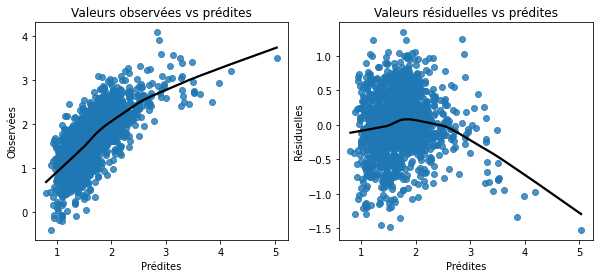

In [38]:
# Linearite:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2,figsize=(10,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'black'})
    ax[0].set_title("Valeurs observées vs prédites")
    ax[0].set(xlabel="Prédites", ylabel="Observées")

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'black'})
    ax[1].set_title("Valeurs résiduelles vs prédites")
    ax[1].set(xlabel="Prédites", ylabel="Résiduelles")
    
linearity_test(model, y)

La relation n'est pas linéaire. L'hypothèse de linéarité n'est pas vérifiée.

La p-value du test d'Aderson-Darling vaux 0.00014352174237811113


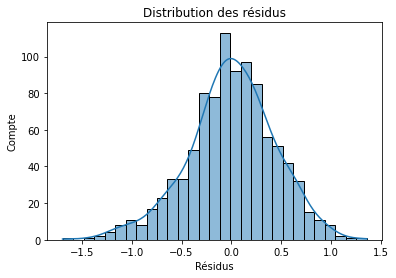

In [39]:
from statsmodels.stats.diagnostic import het_white , normal_ad

# Creation d'une colonne contenant les residus:
y_train["residual"] = y_train["log_emissions"] - y_train["Emissions_pred"]

# Normalite:
print("La p-value du test d'Aderson-Darling vaux", normal_ad(y_train["residual"])[1])

# Graphique:
sns.histplot(y_train["residual"], kde=True)
plt.xlabel("Résidus")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.show()

La p-value d'Anderson-Darling est inférieure au seuil de 0.05, donc on rejette l'hypothèse nulle. Les données ne suivent pas une loi normale. 

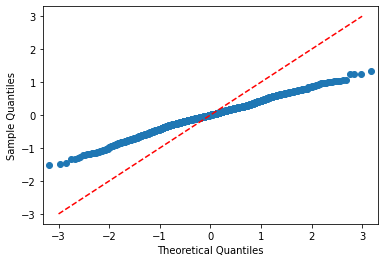

In [40]:
import statsmodels.api as sm
sm.qqplot(model.resid)
# Ajouter une ligne rouge pour les valeurs qui se trouvent à plus de 3 écarts-types de la moyenne
plt.plot([-3, 3], [-3, 3], 'r--')
plt.show()

Les valeurs ne suivent pas la ligne rouge représentant les valeurs attendues pour une distribution normale. 

In [41]:
# Homoscédasticité:
#Test de white
white_test = het_white(model.resid, model.model.exog)
labels_white_test = ["Test Statistique", "p-value", "F-Statistique", "F-Test p-value"]
print(dict(zip(labels_white_test, white_test)))

{'Test Statistique': 591.5760932847882, 'p-value': 7.608889966470988e-10, 'F-Statistique': 1.8640361386713518, 'F-Test p-value': 8.548326800989028e-15}


 Nous utilisons le test de White pour vérifier l'homoscédasticité des résidus. L'hypothèse nulle stipule qu'il y a homoscédasticité des résidus. Dans notre cas, la p-value est inférieure au risque de 5%, l'hypothèse nulle est donc rejetée. Le modèle est hétéroscédastique, les résidus ne sont pas également dispersés. 

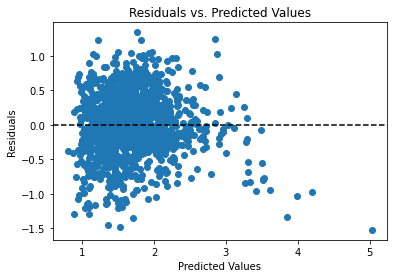

In [42]:
# Plot the residuals vs. the predicted values
plt.scatter(model.predict(),model.resid)
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [43]:
# Affichage des résidus studentisés 
infl = model.get_influence()

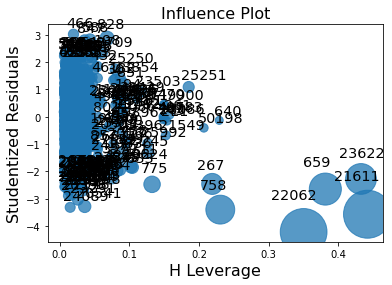

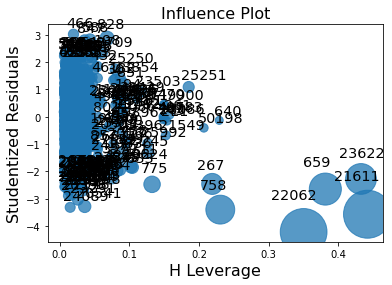

In [44]:
#regardons s'il y a des points suspects
sm.graphics.influence_plot(model)

En abscisses, on a le levier, et résidus studentisés en ordonnées. 

La grosseur des points est basée sur la distance de Cook : influence des observations sur les prédictions du modèle. Il faudrait examiner les observations influentes. 

In [45]:
results = {}

In [46]:
#Création variables X et Y
X = df_ohe
y = df[target_2]

### 4.1.1) Séparation du jeu de données

In [47]:
#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.3, #% de données dans le test
                                                   random_state = 0)

In [48]:
print('Notre X_train est de forme', X_train.shape, 'et y_train est de forme', y_train.shape)
print('Notre X_test est de forme', X_test.shape, 'et y_test est de forme', y_test.shape)

Notre X_train est de forme (954, 35) et y_train est de forme (954, 1)
Notre X_test est de forme (409, 35) et y_test est de forme (409, 1)


### 4.1.2) Calcul des scores

In [49]:
# #Création d'une fonction affichant le score r2, la mse et rmse d'un modèle de régression linéaire
# #données entrainement et données de test
# import time
# start = time.perf_counter()
# def calc_scores(y_train, y_train_pred, y_test, y_test_pred):

#     #Calcul du score R2 pour les données d'entrainement et de test
#     r2_train = r2_score(y_train, y_train_pred)
#     r2_test = r2_score(y_test, y_test_pred)

#     #Calcul de la moyenne des erreurs carrées
#     mse_train = mean_squared_error(y_train, y_train_pred)
#     mse_test = mean_squared_error(y_test, y_test_pred)

#     #Calcul de la racine carrée de la moyenne des erreurs carrées
#     rmse_train = np.sqrt(mse_train)
#     rmse_test = np.sqrt(mse_test)
    
#     print('Pour les données d\'entrainement :')
#     print('Score R2 pour les données d\'entrainement:', round(r2_train, 3))
#     print('MSE pour les données d\'entrainement:', round(mse_train, 3))
#     print('RMSE R2 pour les données d\'entrainement:', round(rmse_train, 3))
#     print('--------------------------------')
#     print('Pour les données de test')
#     print('Score R2 pour les données de test:', round(r2_test, 3))
#     print('MSE pour les données d\'entrainement:', round(mse_test, 3))
#     print('RMSE pour les données d\'entrainement:', round(rmse_test, 3))
    
#     print('------------------')
#     end = time.perf_counter()
#     print('Temps d\'exécution: ', end-start, 'secondes.')

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from numpy import sqrt
from numpy import mean
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import learning_curve

#Ajustement du modèle de régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 4.1.3) Cross-validation avec une pipeline

In [51]:
from sklearn.pipeline import Pipeline

#On crée notre pipeline
pipe_lr = Pipeline([
    ('linear', LinearRegression())
])

In [52]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
reg_lin_score = cross_validate(pipe_lr, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)


results['Linear_Regression'] = reg_lin_score

## 4.2) Modèle naïf (Dummy Regressor)

In [53]:
from sklearn.dummy import DummyRegressor

### 4.2.1) Cross-validation avec une pipeline

In [54]:
#On crée notre pipeline 
pipe_dummy = Pipeline([
    ('dummy', DummyRegressor(strategy="mean"))
])

In [55]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
dummy_reg_score = cross_validate(pipe_dummy, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Dummy_Regressor'] = dummy_reg_score

## 4.3) Ridge Regression

In [56]:
from sklearn.linear_model import Ridge

### 4.3.1)  Cross-validation avec une pipeline

In [57]:
#On crée notre pipeline 
pipe_ridge = Pipeline([
    ('ridge', Ridge())
])

In [58]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
ridge_reg_score = cross_validate(pipe_ridge, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Ridge_Regression'] = ridge_reg_score

## 4.4) Lasso

In [59]:
from sklearn.linear_model import Lasso

### 4.4.1) Cross-validation avec une pipeline

In [60]:
#On crée notre pipeline 
pipe_lasso = Pipeline([
    ('lasso', Lasso(alpha = 0.1))
])

In [61]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
lasso_reg_score = cross_validate(pipe_lasso, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Lasso'] = lasso_reg_score

## 4.5) Elastic net

In [62]:
from sklearn.linear_model import ElasticNet

### 4.5.1) Cross-validation avec une pipeline

In [63]:
#On crée notre pipeline 
pipe_EN = Pipeline([
    ('elastic', ElasticNet(random_state=0,  alpha = 0.1))
])

In [64]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
EN_score = cross_validate(pipe_EN, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Elastic_net'] = EN_score

## 4.6) Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


### 4.6.1) Cross-validation avec une pipeline

In [66]:
#On crée notre pipeline 
pipe_RF = Pipeline([
    ('random_forest', RandomForestRegressor(random_state = 0, n_estimators=100))
])

In [67]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
rfr_score = cross_validate(pipe_RF, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Random_forest_Regression'] = rfr_score

## 4.7) XGBoost Regressor

In [68]:
import xgboost as xgb

### 4.7.1) Cross-validation avec une pipeline

In [69]:
#On crée notre pipeline 
pipe_xgb = Pipeline([
    ('XGBoost', xgb.XGBRegressor(objective ='reg:squarederror'))
])

In [70]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
xgboost_score = cross_validate(pipe_xgb, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['XGBoost_Regressor'] = xgboost_score

## 4.8) Gradient Boosting Regressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

### 4.8.1) Cross-validation avec une pipeline

In [72]:
#On crée notre pipeline 
pipe_gbr = Pipeline([
    ('Gradient', GradientBoostingRegressor(random_state = 0))
])

In [73]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
gradientboost_score = cross_validate(pipe_gbr, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['Graident_Boosting_Regressor'] = gradientboost_score

## 4.9) KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor

### 4.9.1) Cross-validation avec une pipeline

In [75]:
#On crée notre pipeline 
pipe_KNN = Pipeline([
    ('KNN', KNeighborsRegressor(n_neighbors = 5))
])

In [76]:
#Calcul des scores par validation croisée
scoring_methods = {'r2': make_scorer(r2_score),
          'mae': make_scorer(mean_absolute_error),
          'mse': make_scorer(mean_squared_error)}
cv = KFold(n_splits = 5)
KNN_score = cross_validate(pipe_KNN, X_train, y_train, return_train_score = True, cv = cv, scoring = scoring_methods)

results['KNN_Regressor'] = KNN_score

## 4.10) On reporte nos résultats de scores dans un tableau

In [77]:
liste_modeles = ['Linear_Regression', 'Dummy_Regressor', 'Ridge_Regression', 'Lasso', 'Elastic_net', 'Random_forest_Regression', 
                'XGBoost_Regressor', 'Graident_Boosting_Regressor', 'KNN_Regressor']
liste = []
for modele in liste_modeles:
    data = pd.DataFrame(results[modele])
    data['Modele'] = modele
    liste.append(data)
df_results = pd.concat(liste, ignore_index = True)

In [78]:
df_results.head()

,fit_time,score_time,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,Modele
0,0.006011,0.008011,0.523379,0.520564,0.362474,0.334163,0.213972,0.187302,Linear_Regression
1,0.014875,0.011702,0.316108,0.545648,0.355650,0.333005,0.271976,0.183728,Linear_Regression
2,0.010202,0.005820,0.369116,0.539329,0.368260,0.338190,0.235249,0.189150,Linear_Regression
3,0.006009,0.008006,0.465756,0.535035,0.350779,0.334898,0.206397,0.189361,Linear_Regression
4,0.000000,0.013883,0.501318,0.524467,0.347268,0.341774,0.201516,0.191367,Linear_Regression


In [79]:
df_scores = df_results.groupby('Modele').mean().reset_index()
df_scores

,Modele,fit_time,score_time,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse
0,Dummy_Regressor,0.002762,0.007912,-0.004242,0.000000,0.498401,0.497918,0.403787,0.403066
1,Elastic_net,0.005939,0.002306,0.351275,0.370219,0.394744,0.389869,0.260971,0.253785
2,Graident_Boosting_Regressor,0.407310,0.010403,0.609127,0.788731,0.310173,0.227567,0.156589,0.085122
3,KNN_Regressor,0.003953,0.113833,0.456161,0.647548,0.365510,0.294444,0.218993,0.142092
4,Lasso,0.008022,0.007803,0.253149,0.264246,0.422933,0.420347,0.300494,0.296529
5,Linear_Regression,0.007419,0.009484,0.435135,0.533009,0.356886,0.336406,0.225822,0.188182
6,Random_forest_Regression,1.308989,0.028899,0.570052,0.941693,0.319869,0.116572,0.172509,0.023497
7,Ridge_Regression,0.005965,0.004490,0.437583,0.534054,0.356267,0.335915,0.224965,0.187758
8,XGBoost_Regressor,0.201712,0.012276,0.548899,0.995446,0.331011,0.029161,0.181017,0.001836


In [80]:
#Création d'une fonction calculant le RMSE
def rmse(nom_df, col):
    rmse = np.sqrt(nom_df[col])
    return rmse

In [81]:
#On va créer nos nouvelles colonnes de calcul de RMSE et de MAE 
df_scores['test_rmse'] = rmse(df_scores, 'test_mse')
df_scores['train_rmse'] = rmse(df_scores, 'train_mse')

In [82]:
df_scores

,Modele,fit_time,score_time,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,test_rmse,train_rmse
0,Dummy_Regressor,0.002762,0.007912,-0.004242,0.000000,0.498401,0.497918,0.403787,0.403066,0.635443,0.634875
1,Elastic_net,0.005939,0.002306,0.351275,0.370219,0.394744,0.389869,0.260971,0.253785,0.510853,0.503771
2,Graident_Boosting_Regressor,0.407310,0.010403,0.609127,0.788731,0.310173,0.227567,0.156589,0.085122,0.395713,0.291757
3,KNN_Regressor,0.003953,0.113833,0.456161,0.647548,0.365510,0.294444,0.218993,0.142092,0.467967,0.376951
4,Lasso,0.008022,0.007803,0.253149,0.264246,0.422933,0.420347,0.300494,0.296529,0.548174,0.544545
5,Linear_Regression,0.007419,0.009484,0.435135,0.533009,0.356886,0.336406,0.225822,0.188182,0.475207,0.433799
6,Random_forest_Regression,1.308989,0.028899,0.570052,0.941693,0.319869,0.116572,0.172509,0.023497,0.415342,0.153287
7,Ridge_Regression,0.005965,0.004490,0.437583,0.534054,0.356267,0.335915,0.224965,0.187758,0.474305,0.433311
8,XGBoost_Regressor,0.201712,0.012276,0.548899,0.995446,0.331011,0.029161,0.181017,0.001836,0.425461,0.042853


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Dummy_Regressor'),
  Text(1, 0, 'Elastic_net'),
  Text(2, 0, 'Graident_Boosting_Regressor'),
  Text(3, 0, 'KNN_Regressor'),
  Text(4, 0, 'Lasso'),
  Text(5, 0, 'Linear_Regression'),
  Text(6, 0, 'Random_forest_Regression'),
  Text(7, 0, 'Ridge_Regression'),
  Text(8, 0, 'XGBoost_Regressor')])

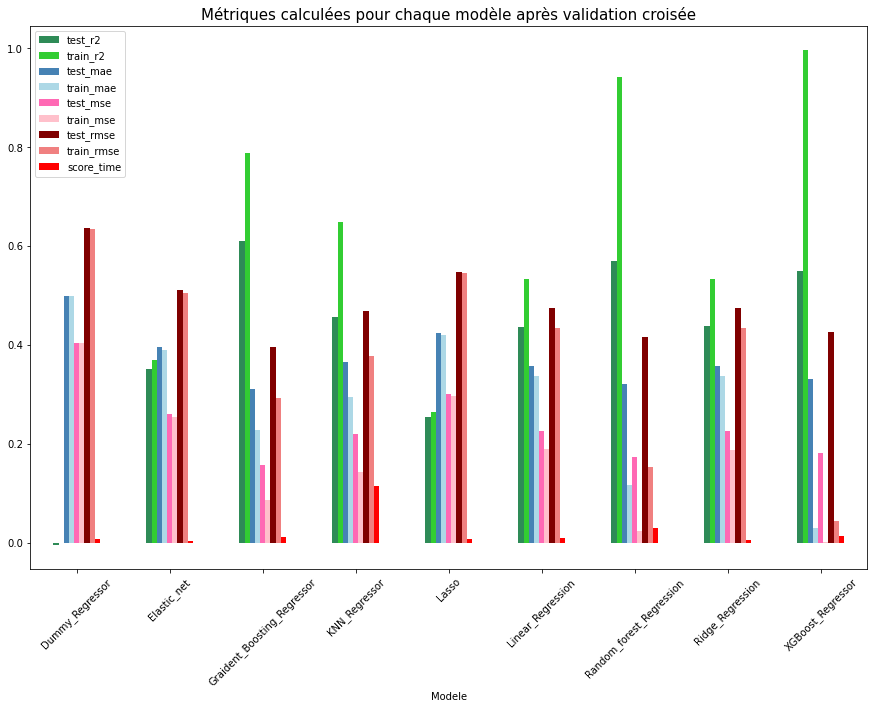

In [83]:
df_scores.plot(x="Modele", 
               y=["test_r2", "train_r2", "test_mae", "train_mae", 'test_mse', "train_mse",
                              "test_rmse", "train_rmse", 'score_time'], 
               color = ['seagreen', 'limegreen', 'steelblue', 'lightblue', 'hotpink', 'pink', 'maroon', 'lightcoral', 'red'],
               kind="bar", figsize=(15,10))
plt.title('Métriques calculées pour chaque modèle après validation croisée', size = 15)
plt.xticks(rotation = 45)

On observe que les 3 modèles dont le score R2 est le plus important concernent essentiellement le **XGBoost Regressor**, puis le **Random Forest Regressor** et le **Gradient Boosting Regressor**. 

## 4.11) Optimisation hyperparamètres avec GridSearchCV 

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [85]:
# Création d'un dictionnaire vide
results_Grid = {}

### 4.11.1) XGBoost Regressor

In [87]:
# Définition des hyperparamètres à tester
param_grid = {'XGBoost__n_estimators': [100, 500, 1000],
              'XGBoost__learning_rate': [0.001, 0.01, 0.5],
              'XGBoost__max_depth': [3, 5, 7]}

In [88]:
# Définition de la validation croisée GridSearchCV
grid_search_xgb = GridSearchCV(pipe_xgb, param_grid, cv=5)

In [89]:
# Entraînement du modèle
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('XGBoost',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_constraint...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid={'XGBoost__learning_rate': [0.001, 0.01, 0.5],
                         'XGBoost__max_depth': [3, 5, 7],
                         'XGBoost__n_estimators': [100, 500, 1000]})

In [90]:
#Affichons les meilleurs paramètres 
print("XGBoost: n_estimators =", grid_search_xgb.best_params_['XGBoost__n_estimators'],
      ", learning_rate =", grid_search_xgb.best_params_['XGBoost__learning_rate'],
      ", max_depth =", grid_search_xgb.best_params_['XGBoost__max_depth'])

XGBoost: n_estimators = 1000 , learning_rate = 0.01 , max_depth = 3


In [91]:
# Afficher les meilleurs paramètres
print("Meilleurs hyperparamètres : ", grid_search_xgb.best_params_)

Meilleurs hyperparamètres :  {'XGBoost__learning_rate': 0.01, 'XGBoost__max_depth': 3, 'XGBoost__n_estimators': 1000}


In [92]:
#Utilisation des meilleurs hyperparamètres
pipe_xgb.set_params(**grid_search_xgb.best_params_)
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=1000,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [97]:
#On crée une fonction calculant les scores des données de test et d'entrainement
def scores_gridsearch(best_param, X_test, y_test, X_train, y_train):
    
    # Prédiction sur les données de test et d'entrainement
    model_pred_test = best_param.predict(X_test)
    model_pred_train = best_param.predict(X_train)
    
    #Calcul erreur quadratique moyenne (RMSE) 
    model_mse_test = mean_squared_error(y_test, model_pred_test)
    model_rmse_test = np.sqrt(model_mse_test)

    model_mse_train = mean_squared_error(y_train, model_pred_train)
    model_rmse_train = np.sqrt(model_mse_test)
    
    # Calcul de l'erreur absolue moyenne (MAE)
    model_mae_test = mean_absolute_error(y_test, model_pred_test)
    model_mae_train = mean_absolute_error(y_train, model_pred_train)
    
    # Calcul du coefficient de détermination (R2)
    model_r2_test = r2_score(y_test, model_pred_test)
    model_r2_train = r2_score(y_train, model_pred_train)


    # Affichage de l'erreur quadratique moyenne (RMSE)
    print("RMSE test:", model_rmse_test, "RMSE train:", model_rmse_train)
    # Affichage de l'erreur absolue moyenne (MAE)
    print("MAE test:", model_mae_test, "MAE train:", model_mae_train)
    #Affichage du coefficient de détermination (R2)
    print("R2 test:", model_r2_test, "R2 train:", model_r2_train)
    
    return model_r2_test, model_r2_train, model_mae_test, model_mae_train, model_mse_test, model_mse_train, model_rmse_test, model_rmse_train

In [98]:
results_Grid['XGBoost_Regressor'] = scores_gridsearch(pipe_xgb, X_test, y_test, X_train, y_train)

RMSE test: 0.39219592252290536 RMSE train: 0.39219592252290536
MAE test: 0.30684438090637417 MAE train: 0.24498188922197456
R2 test: 0.6265815858368894 R2 train: 0.753484912569762


In [99]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(grid_search_xgb.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [100]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

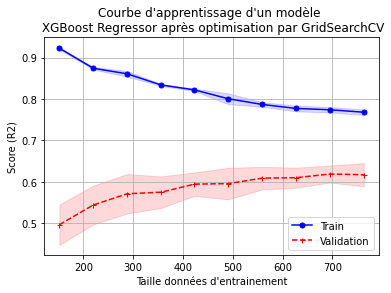

In [101]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Courbe d\'apprentissage d\'un modèle \n XGBoost Regressor après optimisation par GridSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 4.11.2) Gradient Boosting Regressor

In [102]:
# Définition des hyperparamètres à tester
param_grid = {'Gradient__n_estimators': [100, 500, 1000],
              'Gradient__learning_rate': [0.01, 0.1, 0.5],
              'Gradient__max_depth': [1, 3, 5]}

In [103]:
# Définition de la validation croisée GridSearchCV
grid_search_gbr = GridSearchCV(pipe_gbr, param_grid, cv=5)

In [104]:
# Entraînement du modèle
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Gradient',
                                        GradientBoostingRegressor(random_state=0))]),
             param_grid={'Gradient__learning_rate': [0.01, 0.1, 0.5],
                         'Gradient__max_depth': [1, 3, 5],
                         'Gradient__n_estimators': [100, 500, 1000]})

In [105]:
#Affichons les meilleurs paramètres 
print("Gradient Boosting Regressor: n_estimators =", grid_search_gbr.best_params_['Gradient__n_estimators'],
      ", learning_rate =", grid_search_gbr.best_params_['Gradient__learning_rate'],
      ", max_depth =", grid_search_gbr.best_params_['Gradient__max_depth'])

Gradient Boosting Regressor: n_estimators = 1000 , learning_rate = 0.01 , max_depth = 3


In [106]:
#Utilisation des meilleurs hyperparamètres
pipe_gbr.set_params(**grid_search_gbr.best_params_)
pipe_gbr.fit(X_train, y_train)

Pipeline(steps=[('Gradient',
                 GradientBoostingRegressor(learning_rate=0.01,
                                           n_estimators=1000,
                                           random_state=0))])

In [107]:
#Calcul scores données de test et d'entrainement
results_Grid['Gradient_Boosting_Regressor'] = scores_gridsearch(pipe_gbr, X_test, y_test, X_train, y_train)

RMSE test: 0.3918060143477167 RMSE train: 0.3918060143477167
MAE test: 0.30630734538917104 MAE train: 0.23854913789374788
R2 test: 0.6273236971608303 R2 train: 0.7679510327118146


In [108]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(grid_search_gbr.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [109]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

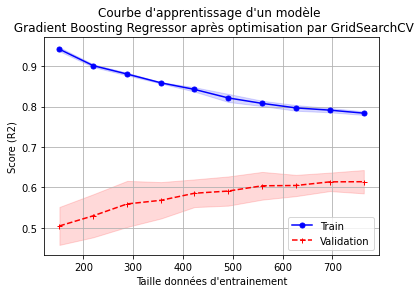

In [110]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Courbe d\'apprentissage d\'un modèle \n Gradient Boosting Regressor après optimisation par GridSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 4.11.3) Random Forest Regression

In [111]:
# Définition des hyperparamètres à tester
param_grid = {'random_forest__n_estimators': [100, 500, 1000],
              'random_forest__max_depth': [3, 5, 7]}

In [112]:
# Définition de la validation croisée GridSearchCV
grid_search_rfr = GridSearchCV(pipe_RF, param_grid, cv=5)

In [113]:
# Entraînement du modèle
grid_search_rfr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('random_forest',
                                        RandomForestRegressor(random_state=0))]),
             param_grid={'random_forest__max_depth': [3, 5, 7],
                         'random_forest__n_estimators': [100, 500, 1000]})

In [114]:
# Affichage des hyperparamètres optimaux
print("Random Forest Regressor: n_estimators =", grid_search_rfr.best_params_['random_forest__n_estimators'],
      ", max_depth =", grid_search_rfr.best_params_['random_forest__max_depth'])

Random Forest Regressor: n_estimators = 500 , max_depth = 7


In [115]:
#Utilisation des meilleurs hyperparamètres
pipe_RF.set_params(**grid_search_rfr.best_params_)
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('random_forest',
                 RandomForestRegressor(max_depth=7, n_estimators=500,
                                       random_state=0))])

In [116]:
#Calcul des scores des données de test et d'entrainement
results_Grid['Random_Forest_Regressor'] = scores_gridsearch(pipe_RF, X_test, y_test, X_train, y_train)

RMSE test: 0.3995596467942085 RMSE train: 0.3995596467942085
MAE test: 0.3087311939244543 MAE train: 0.23666737228054704
R2 test: 0.6124276172591012 R2 train: 0.7738393263793122


In [117]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(grid_search_rfr.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [118]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

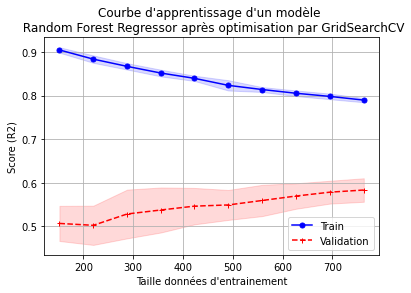

In [119]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
plt.title('Courbe d\'apprentissage d\'un modèle \n Random Forest Regressor après optimisation par GridSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## 4.13) Prédictions  

In [120]:
liste_modeles = ['Random_Forest_Regressor', 'XGBoost_Regressor', 'Gradient_Boosting_Regressor']
liste = []
for modele in liste_modeles: 
    data = pd.DataFrame(results_Grid[modele]).transpose()
    data['Modele'] = modele
    liste.append(data)
df_results = pd.concat(liste, ignore_index = True)
df_results.columns = ['test_r2', 'train_r2', 'test_mae', 'train_mae', 'test_mse', 'train_mse', 'test_rmse', 'train_rmse', 'Modele']

In [121]:
display(df_results)

,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,test_rmse,train_rmse,Modele
0,0.612428,0.773839,0.308731,0.236667,0.159648,0.091174,0.399560,0.399560,Random_Forest_Regressor
1,0.626582,0.753485,0.306844,0.244982,0.153818,0.099379,0.392196,0.392196,XGBoost_Regressor
2,0.627324,0.767951,0.306307,0.238549,0.153512,0.093548,0.391806,0.391806,Gradient_Boosting_Regressor


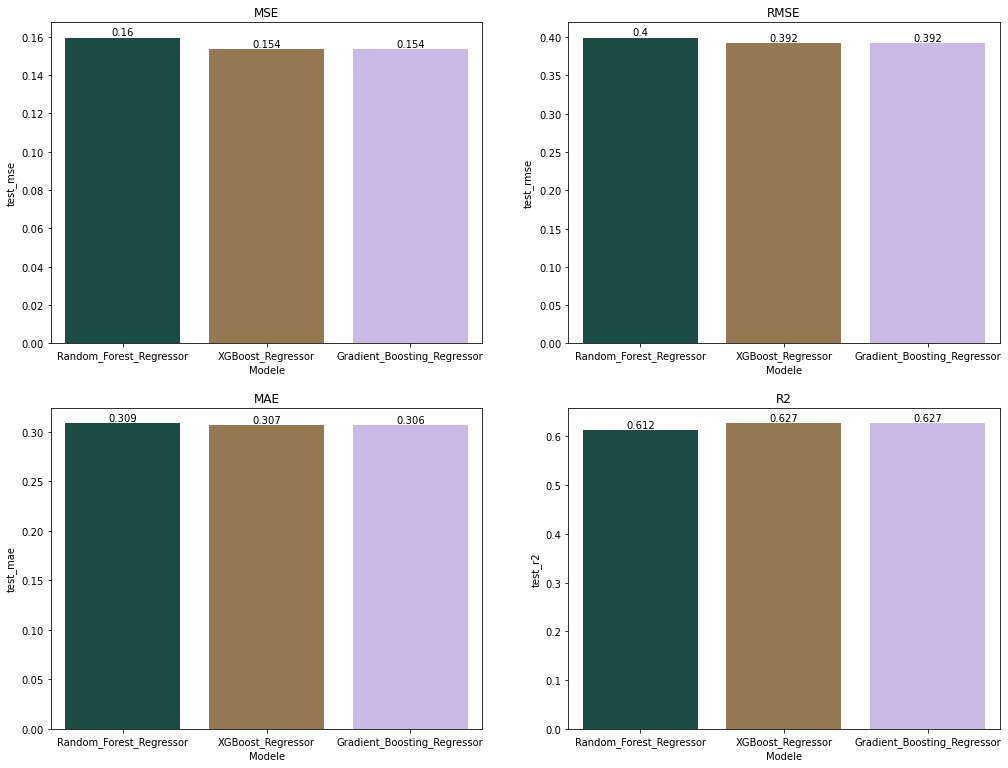

In [122]:
#Représentation graphique

fig,axs=plt.subplots(2,2,figsize=(17,13))

# MSE
subset = df_results[['Modele', 'test_mse']]
sns.barplot(data=subset, x='Modele', y='test_mse', ax=axs[0, 0], palette = 'cubehelix')
for i, value in enumerate(subset.iloc[:, 1]):
    axs[0, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 0].set_title('MSE')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())

#RMSE
subset = df_results[['Modele', 'test_rmse']]
sns.barplot(data=subset, x='Modele', y='test_rmse', ax=axs[0, 1], palette = 'cubehelix')
for i, value in enumerate(subset.iloc[:, 1]):
    axs[0, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 1].set_title('RMSE')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels())

#MAE
subset = df_results[['Modele', 'test_mae']]
sns.barplot(data=subset, x='Modele', y='test_mae', ax=axs[1, 0], palette = 'cubehelix')
for i, value in enumerate(subset.iloc[:, 1]):
    axs[1, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 0].set_title('MAE')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels())

#R2
subset = df_results[['Modele', 'test_r2']]
sns.barplot(data=subset, x='Modele', y='test_r2', ax=axs[1, 1], palette = 'cubehelix')
for i, value in enumerate(subset.iloc[:, 1]):
    axs[1, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 1].set_title('R2')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels())

plt.show()

In [123]:
#On crée une fonction calculant les scores des données de test
def calcul_scores_test(best_param, X_test, y_test):
    # Prédiction sur les données de test et d'entrainement
    model_pred_test = best_param.predict(X_test)
        
    #Calcul erreur quadratique moyenne (RMSE) 
    model_mse_test = mean_squared_error(y_test, model_pred_test)
    model_rmse_test = np.sqrt(model_mse_test)
    
    # Calcul de l'erreur absolue moyenne (MAE)
    model_mae_test = mean_absolute_error(y_test, model_pred_test)
    
    # Calcul du coefficient de détermination (R2)
    model_r2_test = r2_score(y_test, model_pred_test)
    
    return model_pred_test, model_mse_test, model_rmse_test, model_mae_test, model_r2_test

In [124]:
# Appel des fonctions pour calculer les scores des données de test des différents modèles
xgboost_pred_test, xgboost_mse_test, xgboost_rmse_test, xgboost_mae_test, xgboost_r2_test = calcul_scores_test(pipe_xgb, X_test, y_test)
gbr_pred_test, gbr_mse_test, gbr_rmse_test, gbr_mae_test, gbr_r2_test = calcul_scores_test(pipe_gbr, X_test, y_test)
rfr_pred_test, rfr_mse_test, rfr_rmse_test, rfr_mae_test, rfr_r2_test = calcul_scores_test(pipe_RF, X_test, y_test)

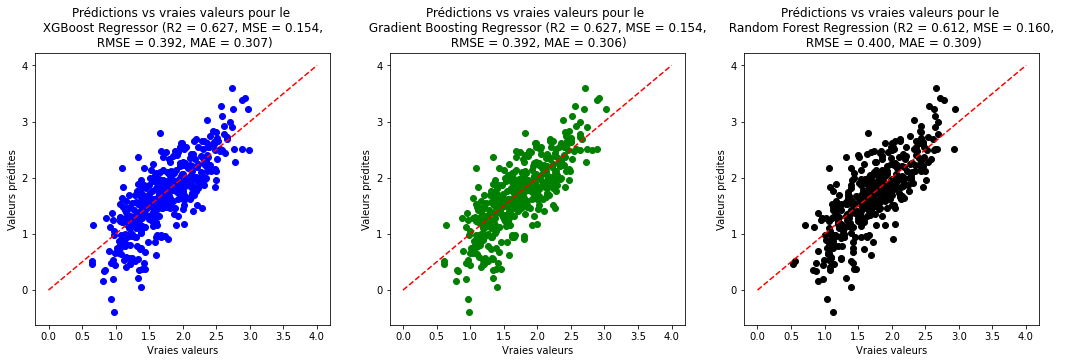

In [125]:
#On va faire des nuages de points pour chaque modèle sélectionné pour l'optimisation

# Création de la figure avec trois sous-graphiques en ligne
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

#Pour XGBoost Regressor
axs[0].scatter(xgboost_pred_test, y_test, color = 'b')
axs[0].plot([0, 4], [0, 4], '--', color='red')
# Ajoutez une légende pour les scores
axs[0].set_xlabel('Vraies valeurs')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Prédictions vs vraies valeurs pour le \n XGBoost Regressor (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(xgboost_r2_test, xgboost_mse_test, xgboost_rmse_test, xgboost_mae_test))

#Pour Gradient Boosting Regressor
axs[1].scatter(gbr_pred_test, y_test, color = 'g')
axs[1].plot([0, 4], [0, 4], '--', color='red')
# Ajoutez une légende pour les scores
axs[1].set_xlabel('Vraies valeurs')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Prédictions vs vraies valeurs pour le \n Gradient Boosting Regressor (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(gbr_r2_test, gbr_mse_test, gbr_rmse_test, gbr_mae_test))

#Pour Random Forest Regression
axs[2].scatter(rfr_pred_test, y_test, color = 'k')
axs[2].plot([0, 4], [0, 4], '--', color='red')
# Ajoutez une légende pour les scores
axs[2].set_xlabel('Vraies valeurs')
axs[2].set_ylabel('Valeurs prédites')
axs[2].set_title('Prédictions vs vraies valeurs pour le \n Random Forest Regression (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(rfr_r2_test, rfr_mse_test, rfr_rmse_test, rfr_mae_test))


plt.show()

La ligne rouge indique les valeurs auxquelles devraient être égales les valeurs observées et de prédiction.  

D'après les nuages de points des valeurs observées et des valeurs prédites, on peut voir que le modèle va avoir tendance à  sous-estimer les faibles valeurs et sur-estimer les fortes valeurs. 

### 4.13.1) SHAP pour le modèle Gradient Boosting Regressor (optimisation GridSearchCV)

In [126]:
import shap

In [127]:
# On utilise la meilleure pipeline de GridSearchCV
best_pipeline = grid_search_gbr.best_estimator_

In [128]:
#On entraine la pipeline sur les données d'entrainement
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Gradient',
                 GradientBoostingRegressor(learning_rate=0.01,
                                           n_estimators=1000,
                                           random_state=0))])

In [129]:
explainer = shap.TreeExplainer(best_pipeline['Gradient'])

In [130]:
# calcul des valeurs Shap pour les données tests
shap_values = explainer.shap_values(X_test)

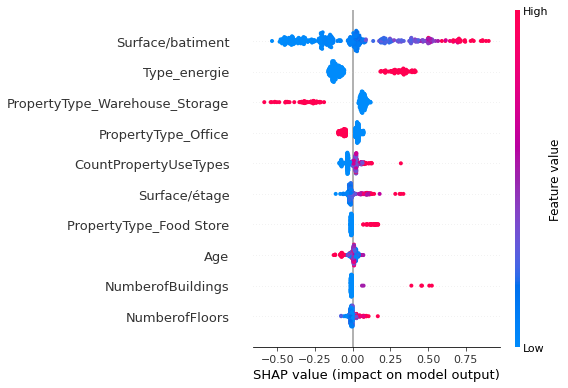

In [131]:
# visualisation des résultats
shap.summary_plot(shap_values, X_test, max_display = 10)

Pour la méthode d'optimisation de **recherche par grille**, nous observons, comme pour les données de consommation, que plus la **surface/bâtiment** est élevée, plus les émissions en CO2 sont fortes. 

## 4.14) Optimisation hyperparamètres avec RandomizedSearchCV
### 4.14.1) XGBoost Regressor

In [132]:
## Essayons avec RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [133]:
# Création d'un dictionnaire vide
results_Grid = {}

In [134]:
#On définit nos hyperparamètres à tester
params = {
    "XGBoost__learning_rate": uniform(0.01, 0.3),  # taux d'apprentissage
    "XGBoost__max_depth": randint(3, 12),  # profondeur maximale de l'arbre
    "XGBoost__n_estimators": randint(100, 1000)}

In [135]:
#On crée l'objet RandomizedSearchCV
R_searchCV_xgb = RandomizedSearchCV(
    pipe_xgb, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

R_searchCV_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('XGBoost',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_cons...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'XGBoost__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C813407F0>,
                                        'XGBoost__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C823890D0>,
                                        'XGBoost__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C82377820>},
                   random_state=42, verbose=1)

In [136]:
# Affichage des hyperparamètres optimaux
print("XGBoost Regressor: n_estimators =", R_searchCV_xgb.best_params_['XGBoost__n_estimators'],
      ", max_depth =", R_searchCV_xgb.best_params_['XGBoost__max_depth'], 
     ", learning_rate =", R_searchCV_xgb.best_params_['XGBoost__learning_rate'])

XGBoost Regressor: n_estimators = 300 , max_depth = 3 , learning_rate = 0.03708693101632249


In [137]:
#Utilisation des meilleurs hyperparamètres
pipe_xgb.set_params(**R_searchCV_xgb.best_params_)
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.03708693101632249, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=300,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [138]:
#Calcul des scores pour les données d'entrainement et de test
results_Grid['XGBoost_Regressor'] = scores_gridsearch(pipe_xgb, X_test, y_test, X_train, y_train)

RMSE test: 0.3924210078014493 RMSE train: 0.3924210078014493
MAE test: 0.3067784632070519 MAE train: 0.23939354547494476
R2 test: 0.6261528454966625 R2 train: 0.7646213742483358


In [139]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(R_searchCV_xgb.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [140]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

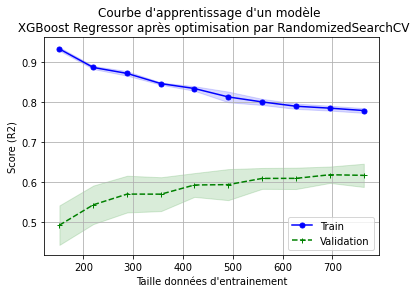

In [141]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Courbe d\'apprentissage d\'un modèle \n XGBoost Regressor après optimisation par RandomizedSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 4.14.2) Gradient Boosting Regressor

In [142]:
#On définit nos hyperparamètres à tester
params = {
    "Gradient__learning_rate": uniform(0.01, 0.3),  # taux d'apprentissage
    "Gradient__max_depth": randint(3, 12),  # profondeur maximale de l'arbre
    "Gradient__n_estimators": randint(100, 1000)}

In [143]:
#On crée l'objet RandomizedSearchCV
R_searchCV_gbr = RandomizedSearchCV(
    pipe_gbr, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

R_searchCV_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Gradient',
                                              GradientBoostingRegressor(learning_rate=0.01,
                                                                        n_estimators=1000,
                                                                        random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'Gradient__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C8239F9A0>,
                                        'Gradient__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C82372700>,
                                        'Gradient__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C824A7070>},
                   random_state=42, verbose=1)

In [144]:
# Affichage des hyperparamètres optimaux
print("Gradient Boosting Regressor: n_estimators =", R_searchCV_gbr.best_params_['Gradient__n_estimators'],
      ", max_depth =", R_searchCV_gbr.best_params_['Gradient__max_depth'], 
     ", learning_rate =", R_searchCV_gbr.best_params_['Gradient__learning_rate'])

Gradient Boosting Regressor: n_estimators = 611 , max_depth = 3 , learning_rate = 0.01729478992943615


In [145]:
#Utilisation des meilleurs hyperparamètres
pipe_gbr.set_params(**R_searchCV_gbr.best_params_)
pipe_gbr.fit(X_train, y_train)

Pipeline(steps=[('Gradient',
                 GradientBoostingRegressor(learning_rate=0.01729478992943615,
                                           n_estimators=611, random_state=0))])

In [146]:
#Calcul des scores pour les données d'entrainement et de test
results_Grid['Gradient_Boosting_Regressor'] = scores_gridsearch(pipe_gbr, X_test, y_test, X_train, y_train)

RMSE test: 0.39176176793484946 RMSE train: 0.39176176793484946
MAE test: 0.30637409481792827 MAE train: 0.23591133150249113
R2 test: 0.6274078646206336 R2 train: 0.7731090672331954


In [147]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(R_searchCV_gbr.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [148]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

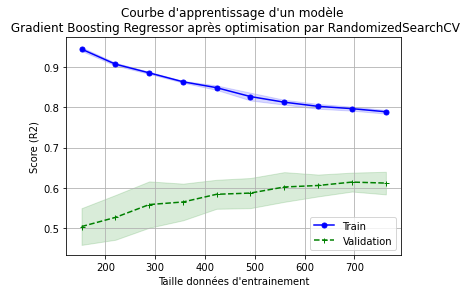

In [149]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Courbe d\'apprentissage d\'un modèle \n Gradient Boosting Regressor après optimisation par RandomizedSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 4.14.3) Random Forest Regression

In [150]:
#On définit nos hyperparamètres à tester
params = {
    "random_forest__max_depth": randint(2, 12),  # profondeur maximale de l'arbre
    "random_forest__n_estimators": randint(100, 1000)}

In [151]:
#On crée l'objet RandomizedSearchCV
R_searchCV_RF = RandomizedSearchCV(
    pipe_RF, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

R_searchCV_RF.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('random_forest',
                                              RandomForestRegressor(max_depth=7,
                                                                    n_estimators=500,
                                                                    random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'random_forest__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C824F7AF0>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CF69E1310>},
                   random_state=42, verbose=1)

In [152]:
# Affichage des hyperparamètres optimaux
print("Random Forest Regression: n_estimators =", R_searchCV_RF.best_params_['random_forest__n_estimators'],
      ", max_depth =", R_searchCV_RF.best_params_['random_forest__max_depth'])

Random Forest Regression: n_estimators = 205 , max_depth = 7


In [153]:
#Utilisation des meilleurs hyperparamètres
pipe_RF.set_params(**R_searchCV_RF.best_params_)
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('random_forest',
                 RandomForestRegressor(max_depth=7, n_estimators=205,
                                       random_state=0))])

In [154]:
#Calcul des scores des données d'entrainement et de test
results_Grid['Random_Forest_Regressor'] = scores_gridsearch(pipe_RF, X_test, y_test, X_train, y_train)

RMSE test: 0.40060054603830575 RMSE train: 0.40060054603830575
MAE test: 0.30973211566339526 MAE train: 0.23704364569630432
R2 test: 0.6104056448883923 R2 train: 0.7735795951795537


In [155]:
#Learning curve
# Obtention de la courbe d'apprentissage
N, train_scores, test_scores = learning_curve(R_searchCV_RF.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = 5)

In [156]:
# Calcul de la moyenne et de l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

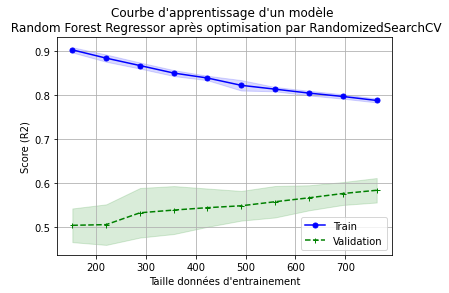

In [157]:
# Création de la courbe d'apprentissage
plt.plot(N, train_mean, color='blue', marker='o', markersize=5, label='Train')
plt.fill_between(N, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(N, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(N, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Courbe d\'apprentissage d\'un modèle \n Random Forest Regressor après optimisation par RandomizedSearchCV')
plt.xlabel('Taille données d\'entrainement')
plt.ylabel('Score (R2)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## 4.15) Prédictions

In [158]:
liste_modeles = ['Random_Forest_Regressor', 'XGBoost_Regressor', 'Gradient_Boosting_Regressor']
liste = []
for modele in liste_modeles:
    data = pd.DataFrame(results_Grid[modele]).transpose()
    data['Modele'] = modele
    liste.append(data)
df_results_rand = pd.concat(liste, ignore_index = True)
df_results_rand.columns = ['test_r2', 'train_r2', 'test_mae', 'train_mae', 'test_mse', 'train_mse', 'test_rmse', 'train_rmse', 'Modele']

In [159]:
#On va ajouter à nos df la méthode d'optimisation des paramètres correspondante

df_results['Method'] = 'GridSearchCV'
df_results_rand['Method'] = 'RandomizedSearchCV'

In [160]:
#On va concaténer nos deux df de résultats 
results_searchCV = pd.concat([df_results, df_results_rand])
results_searchCV

,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,test_rmse,train_rmse,Modele,Method
0,0.612428,0.773839,0.308731,0.236667,0.159648,0.091174,0.399560,0.399560,Random_Forest_Regressor,GridSearchCV
1,0.626582,0.753485,0.306844,0.244982,0.153818,0.099379,0.392196,0.392196,XGBoost_Regressor,GridSearchCV
2,0.627324,0.767951,0.306307,0.238549,0.153512,0.093548,0.391806,0.391806,Gradient_Boosting_Regressor,GridSearchCV
0,0.610406,0.773580,0.309732,0.237044,0.160481,0.091279,0.400601,0.400601,Random_Forest_Regressor,RandomizedSearchCV
1,0.626153,0.764621,0.306778,0.239394,0.153994,0.094890,0.392421,0.392421,XGBoost_Regressor,RandomizedSearchCV
2,0.627408,0.773109,0.306374,0.235911,0.153477,0.091468,0.391762,0.391762,Gradient_Boosting_Regressor,RandomizedSearchCV


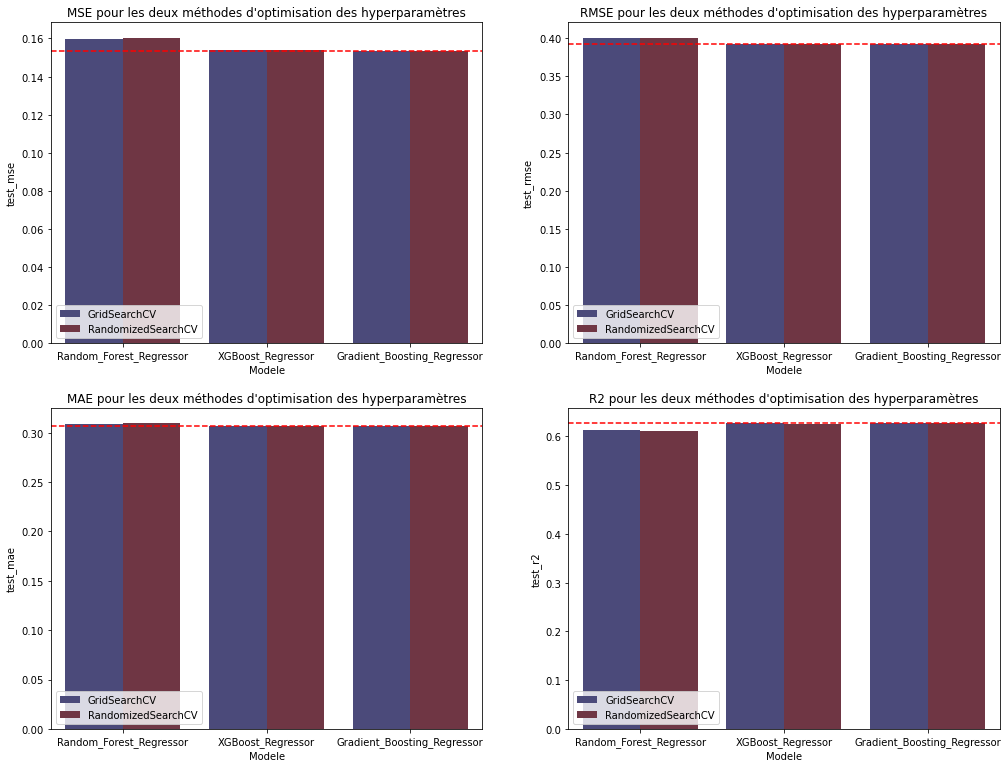

In [161]:
#Représentation graphique

fig,axs=plt.subplots(2,2,figsize=(17,13))
# colors = ['blue','purple','brown','teal']

# MSE
y_min_mse = min(results_searchCV['test_mse'])
subset = results_searchCV[['Modele', 'test_mse', 'Method']]
sns.barplot(data=subset, x='Modele', y='test_mse', ax=axs[0, 0], hue = 'Method', palette = 'icefire')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[0, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 0].set_title('MSE pour les deux méthodes d\'optimisation des hyperparamètres')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())
axs[0, 0].legend(loc = 'lower left')
axs[0, 0].axhline(y=y_min_mse, linestyle='--', color='r')

#RMSE
y_min_rmse = min(results_searchCV['test_rmse'])
subset = results_searchCV[['Modele', 'test_rmse', 'Method']]
sns.barplot(data=subset, x='Modele', y='test_rmse', ax=axs[0, 1], hue = 'Method', palette = 'icefire')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[0, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 1].set_title('RMSE pour les deux méthodes d\'optimisation des hyperparamètres')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels())
axs[0, 1].legend(loc = 'lower left')
axs[0, 1].axhline(y=y_min_rmse, linestyle='--', color='r')

#MAE
y_min_mae = min(results_searchCV['test_mae'])
subset = results_searchCV[['Modele', 'test_mae', 'Method']]
sns.barplot(data=subset, x='Modele', y='test_mae', ax=axs[1, 0], hue = 'Method', palette = 'icefire')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[1, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 0].set_title('MAE pour les deux méthodes d\'optimisation des hyperparamètres')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels())
axs[1, 0].legend(loc = 'lower left')
axs[1, 0].axhline(y=y_min_mae, linestyle='--', color='r')

#R2
y_max_r2 = max(results_searchCV['test_r2'])
subset = results_searchCV[['Modele', 'test_r2', 'Method']]
sns.barplot(data=subset, x='Modele', y='test_r2', ax=axs[1, 1], hue = 'Method', palette = 'icefire')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[1, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 1].set_title('R2 pour les deux méthodes d\'optimisation des hyperparamètres')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels())
axs[1, 1].legend(loc = 'lower left')
axs[1, 1].axhline(y=y_max_r2, linestyle='--', color='r')

plt.show()

Très peu de différences sont observées entre les deux modèles d'optimisation des paramètres. 

In [162]:
# On crée une fonction affichant le modèle avec les meilleures valeurs de score.

def best_model(nom_df, col_r2, col_mae, col_mse, col_rmse, col_model):
    max_r2 = nom_df[col_r2].idxmax()
    min_mae = nom_df[col_mae].idxmin()
    min_mse = nom_df[col_mse].idxmin()
    min_rmse = nom_df[col_mse].idxmin()
        
    liste_max = [max_r2, min_mae, min_mse, min_rmse]
    for i in liste_max:
        modele_max = nom_df.loc[i, col_model]
        print('------------------')
        print('Le modèle correspondant aux résultats les plus performants est:', modele_max)
        

In [163]:
#Affichons le modèle avec les résultats les plus performants.  
best_model(results_searchCV, 'test_r2', 'test_mae', 'test_mse', 'test_rmse', 'Modele')

------------------
Le modèle correspondant aux résultats les plus performants est: 2    Gradient_Boosting_Regressor
2    Gradient_Boosting_Regressor
Name: Modele, dtype: object
------------------
Le modèle correspondant aux résultats les plus performants est: 2    Gradient_Boosting_Regressor
2    Gradient_Boosting_Regressor
Name: Modele, dtype: object
------------------
Le modèle correspondant aux résultats les plus performants est: 2    Gradient_Boosting_Regressor
2    Gradient_Boosting_Regressor
Name: Modele, dtype: object
------------------
Le modèle correspondant aux résultats les plus performants est: 2    Gradient_Boosting_Regressor
2    Gradient_Boosting_Regressor
Name: Modele, dtype: object


In [164]:
# Appel des fonctions pour calculer les scores des données de test des différents modèles
xgboost_pred_rand, xgboost_mse_rand, xgboost_rmse_rand, xgboost_mae_rand, xgboost_r2_rand = calcul_scores_test(pipe_xgb, X_test, y_test)
gbr_pred_rand, gbr_mse_rand, gbr_rmse_rand, gbr_mae_rand, gbr_r2_rand = calcul_scores_test(pipe_gbr, X_test, y_test)
rfr_pred_rand, rfr_mse_rand, rfr_rmse_rand, rfr_mae_rand, rfr_r2_rand = calcul_scores_test(pipe_RF, X_test, y_test)

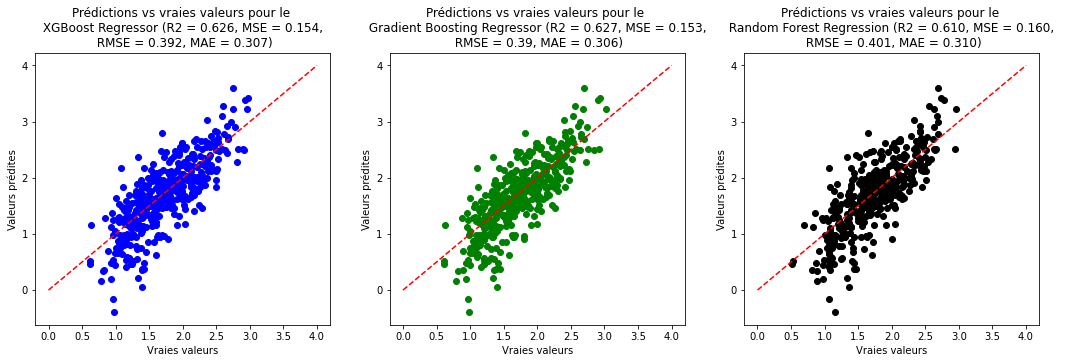

In [165]:
#On va faire des nuages de points pour chaque modèle sélectionné pour l'optimisation

# Création de la figure avec trois sous-graphiques en ligne
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))


#Pour XGBoost Regressor
axs[0].scatter(xgboost_pred_rand, y_test, color = 'b')
axs[0].plot([0, 4], [0, 4], '--', color='red')
# Ajoutez une légende pour les scores
axs[0].set_xlabel('Vraies valeurs')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Prédictions vs vraies valeurs pour le \n XGBoost Regressor (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(xgboost_r2_rand, xgboost_mse_rand, xgboost_rmse_rand, xgboost_mae_rand))

#Pour Gradient Boosting Regressor
axs[1].scatter(gbr_pred_rand, y_test, color = 'g')
axs[1].plot([0, 4], [0, 4], '--', color='red')
# Ajoutez une légende pour les scores
axs[1].set_xlabel('Vraies valeurs')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Prédictions vs vraies valeurs pour le \n Gradient Boosting Regressor (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.2f}, MAE = {:.3f})'.format(gbr_r2_rand, gbr_mse_rand, gbr_rmse_rand, gbr_mae_rand))

#Pour Random Forest Regression
axs[2].scatter(rfr_pred_rand, y_test, color = 'k')
axs[2].plot([0, 4], [0, 4], '--', color='red')
# Ajoutez une légende pour les scores
axs[2].set_xlabel('Vraies valeurs')
axs[2].set_ylabel('Valeurs prédites')
axs[2].set_title('Prédictions vs vraies valeurs pour le \n Random Forest Regression (R2 = {:.3f}, MSE = {:.3f}, \n RMSE = {:.3f}, MAE = {:.3f})'.format(rfr_r2_rand, rfr_mse_rand, rfr_rmse_rand, rfr_mae_rand))


plt.show()

## 4.16) Intérêt de l'Energy Star Score pour la prédiction d'émissions

In [166]:
results_ESS = {}

In [167]:
#Reprenons notre dataframe en gardant les mêmes features ET en rajoutant la variable ESS, on va garder les bâtiments
#où l'ESS est renseigné
features = ['Age', 'PropertyType', 'PropertyGFAParking', 'Neighborhood', 'ZipCode', 'ENERGYSTARScore',
            'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
           'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment', 'Type_energie']

target = ['log_emissions']

In [168]:
#Affichons les lignes comportant des valeurs manquantes pour l'ESS
df.loc[df['ENERGYSTARScore'].isnull(), :].shape[1]

35

In [169]:
#On supprime les lignes comportant des valeurs manquantes
df = df.dropna()

In [170]:
#Création de deux variables contenant les features de type numérique ou catégorielle
num_features = df[features].select_dtypes(include = ['int64', 'float64'])
cat_features = df[features].select_dtypes(include = 'object')

In [171]:
#Créer et ajouter des colonnes (dummies) binaires indiquant (1) ou non (0) la donnée
col_to_encode = cat_features.columns

df_dum = pd.get_dummies(df[features], columns = col_to_encode)
display(df_dum.columns)
df_dum.head()
df_dum.shape

Index(['Age', 'PropertyGFAParking', 'ZipCode', 'ENERGYSTARScore',
       'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors',
       'CountPropertyUseTypes', 'Surface/étage', 'Surface/batiment',
       'Type_energie', 'PropertyType_Food Store',
       'PropertyType_Hospital_Medical Office', 'PropertyType_Hotel',
       'PropertyType_K-12 School', 'PropertyType_Mixed Use Property',
       'PropertyType_Office', 'PropertyType_Other',
       'PropertyType_Warehouse_Storage', 'PropertyType_Worship Facility',
       'Neighborhood_BALLARD', 'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST'],
      dtype='object')

(897, 33)

In [172]:
from sklearn.preprocessing import StandardScaler

#Sélection colonnes à standardiser
col_to_scale = num_features.columns
data_to_scale = df_dum[col_to_scale]

#Initialisation de StandardScaler()
std_scale = StandardScaler()

#Standardisation des colonnes sélectionnées
df_dum[col_to_scale] = std_scale.fit_transform(data_to_scale)

In [173]:
X = df_dum
y = df[target_2]

In [174]:
#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.3, #% de données dans le test
                                                   random_state = 0)

### 4.16.1)XGBoost Regressor

In [175]:
params = {
    "XGBoost__learning_rate": uniform(0.01, 0.3),  # taux d'apprentissage
    "XGBoost__max_depth": randint(3, 12),  # profondeur maximale de l'arbre
    "XGBoost__n_estimators": randint(100, 1000)} # nombre d'arbres

In [176]:
xgb_ess_rand = RandomizedSearchCV(
    pipe_xgb, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

xgb_ess_rand.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('XGBoost',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_cons...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'XGBoost__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C82606FA0>,
                                        'XGBoost__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C823CBE20>,
                                        'XGBoost__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C8241F8B0>},
                   random_state=42, verbose=1)

In [177]:
# Affichage des hyperparamètres optimaux
print("XGBoost Regressor: n_estimators =", xgb_ess_rand.best_params_['XGBoost__n_estimators'],
      ", max_depth =", xgb_ess_rand.best_params_['XGBoost__max_depth'], 
     ", learning_rate =", xgb_ess_rand.best_params_['XGBoost__learning_rate'])

XGBoost Regressor: n_estimators = 300 , max_depth = 3 , learning_rate = 0.03708693101632249


In [178]:
#Utilisation des meilleurs hyperparamètres
pipe_xgb.set_params(**xgb_ess_rand.best_params_)
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.03708693101632249, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=300,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [179]:
results_ESS['XGBoost_Regressor'] = scores_gridsearch(pipe_xgb, X_test, y_test, X_train, y_train)

RMSE test: 0.3431285079545233 RMSE train: 0.3431285079545233
MAE test: 0.26245137026472726 MAE train: 0.1781197758467379
R2 test: 0.6893580174166092 R2 train: 0.8656180671305983


### 4.16.2) Gradient Boosting Regressor

In [180]:
params = {
    "Gradient__learning_rate": uniform(0.01, 0.3),  # taux d'apprentissage
    "Gradient__max_depth": randint(2, 12),  # profondeur maximale de l'arbre
    "Gradient__n_estimators": randint(50, 1000)}

In [181]:
gbr_ess_rand = RandomizedSearchCV(
    pipe_gbr, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

gbr_ess_rand.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Gradient',
                                              GradientBoostingRegressor(learning_rate=0.01729478992943615,
                                                                        n_estimators=611,
                                                                        random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'Gradient__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CFBC36550>,
                                        'Gradient__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026C8239FA90>,
                                        'Gradient__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CFC3FEB20>},
                   random_state=42, verbose=1)

In [182]:
# Affichage des hyperparamètres optimaux
print("Gradient Boosting Regressor: n_estimators =", gbr_ess_rand.best_params_['Gradient__n_estimators'],
      ", max_depth =", gbr_ess_rand.best_params_['Gradient__max_depth'], 
     ", learning_rate =", gbr_ess_rand.best_params_['Gradient__learning_rate'])

Gradient Boosting Regressor: n_estimators = 51 , max_depth = 2 , learning_rate = 0.1765602434798387


In [183]:
#Utilisation des meilleurs hyperparamètres
pipe_gbr.set_params(**gbr_ess_rand.best_params_)
pipe_gbr.fit(X_train, y_train)

Pipeline(steps=[('Gradient',
                 GradientBoostingRegressor(learning_rate=0.1765602434798387,
                                           max_depth=2, n_estimators=51,
                                           random_state=0))])

In [184]:
#Calcul des scores pour les données d'entrainement et de test
results_ESS['Gradient_Boosting_Regressor'] = scores_gridsearch(pipe_gbr, X_test, y_test, X_train, y_train)

RMSE test: 0.33901795642035887 RMSE train: 0.33901795642035887
MAE test: 0.264429629706256 MAE train: 0.21753436292605577
R2 test: 0.6967561868874714 R2 train: 0.8044218052726207


### 4.16.3) Random Forest Regression

In [185]:
params = {
    "random_forest__max_depth": randint(2, 12),  # profondeur maximale de l'arbre
    "random_forest__n_estimators": randint(100, 1000)}

In [186]:
rfr_ess_rand = RandomizedSearchCV(
    pipe_RF, params, random_state=42, n_iter=100, cv=5, verbose=1, n_jobs=-1
)

rfr_ess_rand.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('random_forest',
                                              RandomForestRegressor(max_depth=7,
                                                                    n_estimators=205,
                                                                    random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'random_forest__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CFB03F910>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CF26219A0>},
                   random_state=42, verbose=1)

In [187]:
# Affichage des hyperparamètres optimaux
print("Random Forest Regressor: n_estimators =", rfr_ess_rand.best_params_['random_forest__n_estimators'],
      ", max_depth =", rfr_ess_rand.best_params_['random_forest__max_depth'])

Random Forest Regressor: n_estimators = 653 , max_depth = 11


In [188]:
#Utilisation des meilleurs hyperparamètres
pipe_RF.set_params(**rfr_ess_rand.best_params_)
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('random_forest',
                 RandomForestRegressor(max_depth=11, n_estimators=653,
                                       random_state=0))])

In [189]:
#Calcul des scores des données d'entrainement et de test
results_ESS['Random_Forest_Regressor'] = scores_gridsearch(pipe_RF, X_test, y_test, X_train, y_train)

RMSE test: 0.36640833722059085 RMSE train: 0.36640833722059085
MAE test: 0.2780735785405501 MAE train: 0.11075492631116583
R2 test: 0.6457766061877639 R2 train: 0.9487410329710239


### a) Comparaison des scores avec et sans l'Energy Star Score

In [190]:
liste_modeles = ['Random_Forest_Regressor', 'XGBoost_Regressor', 'Gradient_Boosting_Regressor']
liste = []
for modele in liste_modeles: 
    data = pd.DataFrame(results_ESS[modele]).transpose()
    data['Modele'] = modele
    liste.append(data)
df_results_ESS = pd.concat(liste, ignore_index = True)
df_results_ESS.columns = ['test_r2', 'train_r2', 'test_mae', 'train_mae', 'test_mse', 'train_mse', 'test_rmse', 'train_rmse', 'Modele']

In [191]:
#On ajoute une colonne 'ESS'
df_results_ESS['ESS'] = 'Avec ESS'

In [192]:
#On récupère notre dataframe des résultats avec l'ESS
df_results_rand

#On ajoute une colonne 'ESS'
df_results_rand['ESS'] = 'Sans ESS'

In [193]:
#On concatène nos dataframes
results_ESS_rand = pd.concat([df_results_ESS, df_results_rand])
display(results_ESS_rand)

,test_r2,train_r2,test_mae,train_mae,test_mse,train_mse,test_rmse,train_rmse,Modele,ESS,Method
0,0.645777,0.948741,0.278074,0.110755,0.134255,0.019295,0.366408,0.366408,Random_Forest_Regressor,Avec ESS,NaN
1,0.689358,0.865618,0.262451,0.178120,0.117737,0.050584,0.343129,0.343129,XGBoost_Regressor,Avec ESS,NaN
2,0.696756,0.804422,0.264430,0.217534,0.114933,0.073619,0.339018,0.339018,Gradient_Boosting_Regressor,Avec ESS,NaN
0,0.610406,0.773580,0.309732,0.237044,0.160481,0.091279,0.400601,0.400601,Random_Forest_Regressor,Sans ESS,RandomizedSearchCV
1,0.626153,0.764621,0.306778,0.239394,0.153994,0.094890,0.392421,0.392421,XGBoost_Regressor,Sans ESS,RandomizedSearchCV
2,0.627408,0.773109,0.306374,0.235911,0.153477,0.091468,0.391762,0.391762,Gradient_Boosting_Regressor,Sans ESS,RandomizedSearchCV


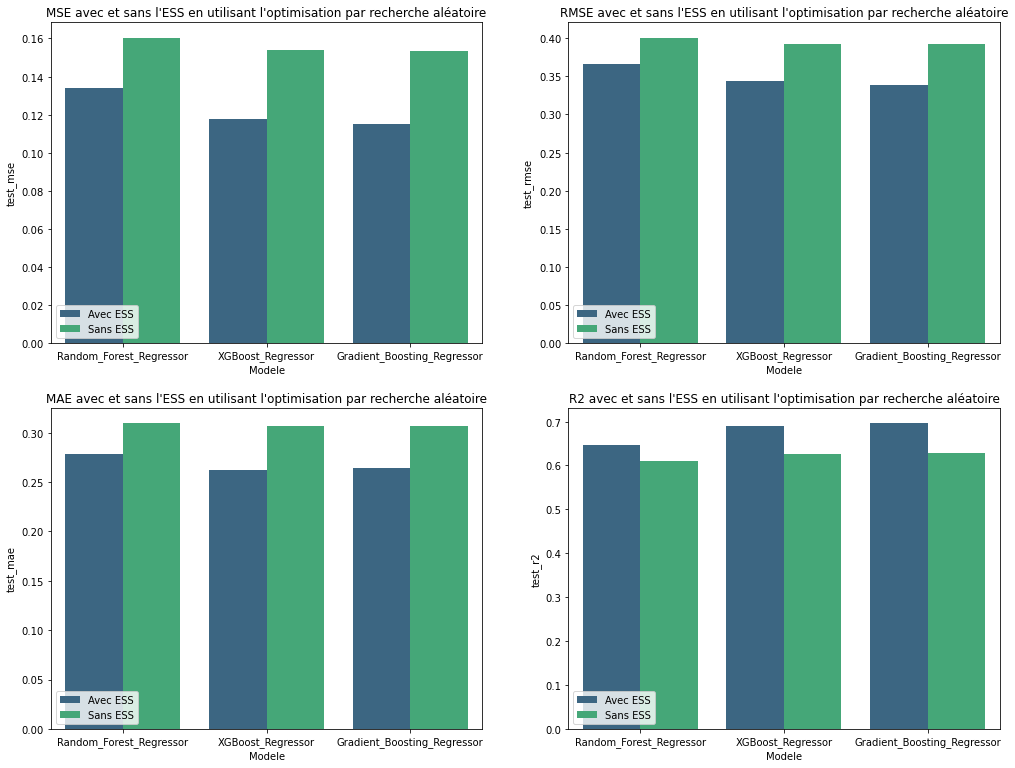

In [194]:
#Représentation graphique

fig,axs=plt.subplots(2,2,figsize=(17,13))

# MSE
subset = results_ESS_rand[['Modele', 'test_mse', 'ESS']]
sns.barplot(data=subset, x='Modele', y='test_mse', ax=axs[0, 0], hue = 'ESS', palette = 'viridis')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[0, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 0].set_title('MSE avec et sans l\'ESS en utilisant l\'optimisation par recherche aléatoire')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())
axs[0, 0].legend(loc = 'lower left')

#RMSE
subset = results_ESS_rand[['Modele', 'test_rmse', 'ESS']]
sns.barplot(data=subset, x='Modele', y='test_rmse', ax=axs[0, 1], hue = 'ESS', palette = 'viridis')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[0, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[0, 1].set_title('RMSE avec et sans l\'ESS en utilisant l\'optimisation par recherche aléatoire')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels())
axs[0, 1].legend(loc = 'lower left')

#MAE
subset = results_ESS_rand[['Modele', 'test_mae', 'ESS']]
sns.barplot(data=subset, x='Modele', y='test_mae', ax=axs[1, 0], hue = 'ESS', palette = 'viridis')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[1, 0].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 0].set_title('MAE avec et sans l\'ESS en utilisant l\'optimisation par recherche aléatoire')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels())
axs[1, 0].legend(loc = 'lower left')

#R2
subset = results_ESS_rand[['Modele', 'test_r2', 'ESS']]
sns.barplot(data=subset, x='Modele', y='test_r2', ax=axs[1, 1], hue = 'ESS', palette = 'viridis')
# for i, value in enumerate(subset.iloc[:, 1]):
#     axs[1, 1].annotate(round(value, 3), xy=(i, value), ha='center', va='bottom')
axs[1, 1].set_title('R2 avec et sans l\'ESS en utilisant l\'optimisation par recherche aléatoire')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels())
axs[1, 1].legend(loc = 'lower left')

plt.show()

Nous observons que pour chacun des modèles, lorsque l'on enlève l'**Energy Star Score**, les prédictions sont moins performantes. Le calcul de l'Energy Star Score est donc intéressant à utiliser pour la prédiction d'émissions, il se base probablement sur des caractéristiques non fournies dans notre dataset (isolation, durée d'utilisation du bâtiment, ...). La différence semble plus flagrante pour les modèles de XGBoost et Gradient Boosting Regressor. 

In [195]:
#On refait un SHAP en prenant en compte l'ESS
# On utilise la meilleure pipeline de GridSearchCV
best_pipeline = gbr_ess_rand.best_estimator_

In [196]:
#On entraine la pipeline sur les données d'entrainement
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Gradient',
                 GradientBoostingRegressor(learning_rate=0.1765602434798387,
                                           max_depth=2, n_estimators=51,
                                           random_state=0))])

In [197]:
# instanciation de l'objet TreeExplainer
explainer = shap.TreeExplainer(best_pipeline['Gradient'])

In [198]:
# calcul des valeurs Shap pour toutes les observations
shap_values = explainer.shap_values(X_test)

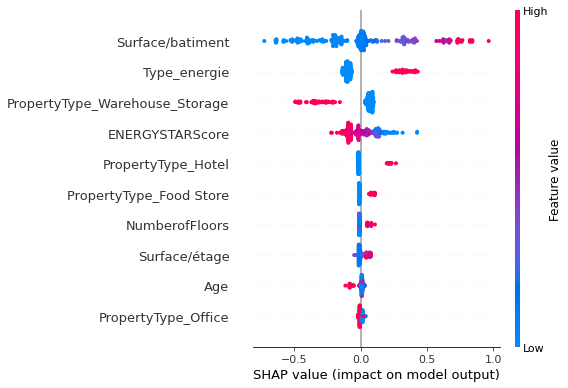

In [199]:
# visualisation des résultats
shap.summary_plot(shap_values, X_test, max_display = 10)

L'**Energy Star** Score arrive en tête de classement, ici en 4ème position.